<a href="https://colab.research.google.com/github/deepakkanneganti9/MPDD_IoT_Environments/blob/copilot%2Fmove-obe-file-to-new-folder/Experiment_1_MPDD_Framework_Poke_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Poke Dataset PMDD**
---

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
poker_hand = fetch_ucirepo(id=158)

# data (as pandas dataframes)
X = poker_hand.data.features
y = poker_hand.data.targets

# metadata
print(poker_hand.metadata)

# variable information
print(poker_hand.variables)


{'uci_id': 158, 'name': 'Poker Hand', 'repository_url': 'https://archive.ics.uci.edu/dataset/158/poker+hand', 'data_url': 'https://archive.ics.uci.edu/static/public/158/data.csv', 'abstract': 'Purpose is to predict poker hands', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1025010, 'num_features': 10, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['CLASS'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2002, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5KW38', 'creators': ['Robert Cattral', 'Franz Oppacher'], 'intro_paper': None, 'additional_info': {'summary': 'Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". T

{'data': {'ids': None,
  'features':          S1  C1  S2  C2  S3  C3  S4  C4  S5  C5
  0         1  10   1  11   1  13   1  12   1   1
  1         2  11   2  13   2  10   2  12   2   1
  2         3  12   3  11   3  13   3  10   3   1
  3         4  10   4  11   4   1   4  13   4  12
  4         4   1   4  13   4  12   4  11   4  10
  ...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
  1025005   3   1   1  12   2   9   4   9   2   6
  1025006   3   3   4   5   2   7   1   4   4   3
  1025007   1  11   4   7   3   9   1  13   2   7
  1025008   3  11   1   8   1   1   3  13   2   8
  1025009   2   5   2   9   4   9   2   3   3   3
  
  [1025010 rows x 10 columns],
  'targets':          CLASS
  0            9
  1            9
  2            9
  3            9
  4            9
  ...        ...
  1025005      1
  1025006      1
  1025007      1
  1025008      1
  1025009      2
  
  [1025010 rows x 1 columns],
  'original':          S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
  0         1 

In [3]:
X.columns

Index(['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5'], dtype='object')

In [4]:
y.columns

Index(['CLASS'], dtype='object')

In [5]:
X

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,10,1,11,1,13,1,12,1,1
1,2,11,2,13,2,10,2,12,2,1
2,3,12,3,11,3,13,3,10,3,1
3,4,10,4,11,4,1,4,13,4,12
4,4,1,4,13,4,12,4,11,4,10
...,...,...,...,...,...,...,...,...,...,...
1025005,3,1,1,12,2,9,4,9,2,6
1025006,3,3,4,5,2,7,1,4,4,3
1025007,1,11,4,7,3,9,1,13,2,7
1025008,3,11,1,8,1,1,3,13,2,8


In [6]:
y

,CLASS
0,9
1,9
2,9
3,9
4,9
...,...
1025005,1
1025006,1
1025007,1
1025008,1


In [9]:
# ============================================================
import pandas as pd
feature_columns = [
    'S1', 'C1',
    'S2', 'C2',
    'S3', 'C3',
    'S4', 'C4',
    'S5', 'C5'
]

# Build dataframe exactly like the weather pipeline
df = pd.DataFrame(X, columns=feature_columns)

# Handle y whether Series or DataFrame
df['CLASS'] = y.iloc[:, 0].values if isinstance(y, pd.DataFrame) else y


In [11]:
df.to_csv("poker.csv")

In [12]:
# ============================================================
# Poker Hand Dataset – ANN Classification (Single Cell)
# Uses existing X and y → rebuilds df → trains ANN
# ============================================================

# === Import Libraries ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ============================================================
# Step 0: Reconstruct DataFrame from existing X and y
# ============================================================

feature_columns = [
    'S1', 'C1',
    'S2', 'C2',
    'S3', 'C3',
    'S4', 'C4',
    'S5', 'C5'
]

# Build dataframe exactly like the weather pipeline
df = pd.DataFrame(X, columns=feature_columns)

# Handle y whether Series or DataFrame
df['CLASS'] = y.iloc[:, 0].values if isinstance(y, pd.DataFrame) else y

# ============================================================
# Step 1: Select Features and Target
# ============================================================

X = df[feature_columns]
y = df['CLASS']

# ============================================================
# Step 2: Train–Test Split
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# ============================================================
# Step 3: Feature Scaling
# ============================================================

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ============================================================
# Step 4: Build ANN Model (Multi-class: 10 poker hands)
# ============================================================

num_classes = df['CLASS'].nunique()

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# ============================================================
# Step 5: Compile Model
# ============================================================

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ============================================================
# Step 6: Train Model
# ============================================================

history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ============================================================
# Step 7: Evaluate Model
# ============================================================

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\n✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("✅ Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
17938/17938 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.5303 - loss: 0.9751 - val_accuracy: 0.5819 - val_loss: 0.8845
Epoch 2/5
17938/17938 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.5946 - loss: 0.8793 - val_accuracy: 0.7308 - val_loss: 0.7072
Epoch 3/5
17938/17938 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.6875 - loss: 0.7444 - val_accuracy: 0.7838 - val_loss: 0.5554
Epoch 4/5
17938/17938 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7409 - loss: 0.6507 - val_accuracy: 0.8208 - val_loss: 0.4905
Epoch 5/5
17938/17938 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.7663 - loss: 0.6005 - val_accuracy: 0.8436 - val_loss: 0.4186
9610/9610 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step

✅ Confusion Matrix:
[[153453    658      0      0      0      0      0      0      0      0]
 [ 29682 100222     12      8      5      0      0      0      0      0]
 [   205  12049   2078    317      0      0      0      0      0      0]
 [     0   2380    991   3119      0      0      0      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
df['CLASS'].value_counts()

,count
CLASS,
0,513702
1,433097
2,48828
3,21634
4,3978
5,2050
6,1460
7,236
8,17


In [14]:
df.to_csv("drift.csv")

In [15]:
df['CLASS'].value_counts()

,count
CLASS,
0,513702
1,433097
2,48828
3,21634
4,3978
5,2050
6,1460
7,236
8,17


In [18]:
df = df.sample(n=100000, random_state=42)
df.to_csv("poke.csv")

**Drift Injection**
---

In [ ]:
import pandas as pd
import numpy as np

# ---------- IO ----------
def load_data(path):
    """Load dataset with features and label in last column."""
    df = pd.read_csv(path)
    X = df.iloc[:, :-1].copy()
    y = df.iloc[:, -1].copy()
    return X, y

def _return_with_label_last(X_new, y_new):
    out = X_new.copy()
    out[y_new.name] = y_new.values
    return out

# ---------- SUDDEN DRIFT — TYPE 1 (USING ABSOLUTE SAMPLE COUNTS) ----------
def sudden_drift_type1_delayed_abrupt(
    X, y,
    *, clean_samples=5000,        # <<< FIXED: Absolute number of clean samples
    corruption_samples=None,      # <<< FIXED: Absolute number of corrupted samples
    corruption_rate=1.0, shuffle_X=True, random_state=None
):
    """
    FIXED: Uses ABSOLUTE sample counts instead of percentages
    clean_samples: Number of samples to keep clean from the start
    corruption_samples: Number of samples to corrupt after clean_samples (default: all remaining)
    """
    rng = np.random.default_rng(random_state)
    n = len(y)
    X_new, y_new = X.copy(), y.copy()
    classes = y.unique()

    # Calculate corruption range
    start_corrupt = clean_samples
    if corruption_samples is None:
        end_corrupt = n  # Corrupt all remaining samples
    else:
        end_corrupt = min(n, start_corrupt + corruption_samples)

    if start_corrupt < n:
        tail_idx = np.arange(start_corrupt, end_corrupt)
        if corruption_rate >= 1.0:
            sel_idx = tail_idx
        else:
            mask = rng.random(len(tail_idx)) < float(corruption_rate)
            sel_idx = tail_idx[mask]

        if len(sel_idx) > 0:
            # STRONG label corruption for specified samples
            for idx in sel_idx:
                true_class = y_new.iloc[idx]
                wrong_classes = [c for c in classes if c != true_class]
                if wrong_classes:
                    y_new.iloc[idx] = rng.choice(wrong_classes)

            # STRONG feature corruption for specified samples
            if shuffle_X:
                for col in X.columns:
                    if X[col].dtype in ['float64', 'int64']:
                        original_vals = X_new[col].iloc[sel_idx].values
                        # Massive corruption: large noise + mean shift
                        noise = rng.normal(0, 5 * original_vals.std(), len(sel_idx))
                        shift = 4 * original_vals.std() * rng.choice([-1, 1])
                        X_new[col].iloc[sel_idx] = original_vals + noise + shift
                    else:
                        # Complete categorical scrambling
                        unique_vals = X[col].unique()
                        new_vals = rng.choice(unique_vals, size=len(sel_idx), replace=True)
                        X_new[col].iloc[sel_idx] = new_vals

    print(f"SUDDEN TYPE 1 FIXED: First {start_corrupt} samples CLEAN -> Samples {start_corrupt} to {end_corrupt} STRONGLY CORRUPTED")
    return _return_with_label_last(X_new, y_new)

# ---------- SUDDEN DRIFT — TYPE 2 (USING ABSOLUTE SAMPLE COUNTS) ----------
def sudden_drift_type2_abrupt_then_recover(
    X, y,
    *, corrupt_samples=5000,      # <<< FIXED: Absolute number of corrupted samples
    recovery_samples=5000,        # <<< FIXED: Absolute number of recovery samples
    start_rate=1.0, end_rate=0.0,
    decay_shape=0.7,
    shuffle_X=True, random_state=None
):
    """
    FIXED: Uses ABSOLUTE sample counts instead of percentages
    corrupt_samples: Number of samples to fully corrupt from the start
    recovery_samples: Number of samples for gradual recovery phase
    """
    rng = np.random.default_rng(random_state)
    n = len(y)
    X_new, y_new = X.copy(), y.copy()
    classes = y.unique()

    # Calculate ranges using absolute counts
    corrupt_end = min(n, corrupt_samples)
    recovery_end = min(n, corrupt_end + recovery_samples)

    # Build per-index corruption probability vector
    p = np.zeros(n, dtype=float)

    # 1) INITIAL CORRUPTION: First X samples fully corrupted
    if corrupt_end > 0:
        p[:corrupt_end] = float(start_rate)

    # 2) GRADUAL RECOVERY: Next Y samples gradual recovery
    if recovery_end > corrupt_end:
        recovery_length = recovery_end - corrupt_end
        t = np.linspace(0.0, 1.0, recovery_length, endpoint=True)
        # Gradual decay from full corruption to clean
        p[corrupt_end:recovery_end] = end_rate + (start_rate - end_rate) * (1.0 - t**decay_shape)

    # 3) REMAINING SAMPLES: Clean (p=0)

    # Sample indices to corrupt by probability p
    mask = rng.random(n) < p
    sel_idx = np.where(mask)[0]

    if len(sel_idx) > 0:
        # Apply corruption based on probability
        for idx in sel_idx:
            true_class = y_new.iloc[idx]
            wrong_classes = [c for c in classes if c != true_class]
            if wrong_classes:
                y_new.iloc[idx] = rng.choice(wrong_classes)

        # Feature corruption intensity based on corruption probability
        if shuffle_X:
            for col in X.columns:
                if X[col].dtype in ['float64', 'int64']:
                    for idx in sel_idx:
                        corruption_strength = p[idx]  # Strength based on position
                        original_val = X_new[col].iloc[idx]
                        noise = rng.normal(0, 4 * corruption_strength * X[col].std())
                        shift = 3 * corruption_strength * X[col].std() * rng.choice([-1, 1])
                        X_new[col].iloc[idx] = original_val + noise + shift
                else:
                    # For categorical features in fully corrupted region
                    if idx < corrupt_end:
                        unique_vals = X[col].unique()
                        new_val = rng.choice(unique_vals)
                        X_new[col].iloc[idx] = new_val

    print(f"SUDDEN TYPE 2 FIXED: First {corrupt_end} samples CORRUPTED -> Next {recovery_length} samples GRADUAL RECOVERY -> Last {n-recovery_end} samples CLEAN")
    return _return_with_label_last(X_new, y_new)

# ---------- RECURRENT DRIFT (USING ABSOLUTE SAMPLE COUNTS) ----------
def recurrent_drift(X, y, segment_samples=400, *, shuffle_X=True, random_state=None):
    """
    FIXED: Uses absolute sample count for segment size
    segment_samples: Number of samples in each segment (clean/corrupt alternate)
    """
    rng = np.random.default_rng(random_state)
    n = len(y)
    n_segments = (n + segment_samples - 1) // segment_samples
    X_new, y_new = X.copy(), y.copy()
    classes = y.unique()

    for i in range(n_segments):
        s = i * segment_samples
        e = min((i + 1) * segment_samples, n)

        if i % 2 == 1:  # CORRUPTED BLOCK
            # High percentage label corruption
            corrupt_indices = rng.choice(np.arange(s, e), size=int(0.85 * (e-s)), replace=False)
            for idx in corrupt_indices:
                true_class = y_new.iloc[idx]
                wrong_classes = [c for c in classes if c != true_class]
                if wrong_classes:
                    y_new.iloc[idx] = rng.choice(wrong_classes)

            # Strong feature corruption
            if shuffle_X:
                for col in X.columns:
                    if X[col].dtype in ['float64', 'int64']:
                        original_vals = X_new[col].iloc[s:e].values
                        noise = rng.normal(0, 6 * original_vals.std(), e-s)
                        shift = 5 * original_vals.std() * rng.choice([-1, 1])
                        X_new[col].iloc[s:e] = original_vals + noise + shift
                    else:
                        unique_vals = X[col].unique()
                        new_vals = rng.choice(unique_vals, size=(e-s), replace=True)
                        X_new[col].iloc[s:e] = new_vals

            print(f"RECURRENT: Segment {i} ({s}-{e}) CORRUPTED")

        else:  # CLEAN BLOCK
            # Leave completely unchanged for perfect accuracy
            X_new.iloc[s:e] = X.iloc[s:e].to_numpy(copy=True)
            y_new.iloc[s:e] = y.iloc[s:e].to_numpy(copy=True)
            print(f"RECURRENT: Segment {i} ({s}-{e}) CLEAN")

    return _return_with_label_last(X_new, y_new)

# ---------- USAGE ----------
if __name__ == "__main__":
    file_path = "drift.csv"
    X, y = load_data(file_path)
    n_total = len(y)
    print(f"Total samples: {n_total}")

    # pristine
    df_nodrift = _return_with_label_last(X, y)
    df_nodrift.to_csv("poke_no_drift.csv", index=False)

    # Sudden Type 1: First 5000 CLEAN -> Next 5000 CORRUPTED
    df_sudden_type1 = sudden_drift_type1_delayed_abrupt(
        X, y,
        clean_samples=5000,        # First 5000 samples clean
        corruption_samples=5000,   # Next 5000 samples corrupted
        corruption_rate=1.0,
        shuffle_X=True,
        random_state=42
    )

    # Sudden Type 2: First 5000 CORRUPTED -> Next 5000 RECOVERY
    df_sudden_type2 = sudden_drift_type2_abrupt_then_recover(
        X, y,
        corrupt_samples=5000,      # First 5000 samples corrupted
        recovery_samples=5000,     # Next 5000 samples gradual recovery
        start_rate=1.0,
        end_rate=0.0,
        decay_shape=0.7,
        shuffle_X=True,
        random_state=42
    )

    # Recurrent: Alternating every 400 samples
    df_recurrent = recurrent_drift(
        X, y,
        segment_samples=400,       # Each segment = 400 samples
        shuffle_X=True,
        random_state=42
    )

    # Save datasets
    df_sudden_type1.to_csv("poke_sudden_drift_type1_delayed_abrupt.csv", index=False)
    df_sudden_type2.to_csv("poke_sudden_drift_type2_abrupt_recover.csv", index=False)
    df_recurrent.to_csv("poke_recurrent_drift.csv", index=False)

    print("\n=== PRECISE DRIFT PATTERNS (ABSOLUTE COUNTS) ===")
    print("Sudden Type 1: Samples 0-4999 CLEAN -> Samples 5000-9999 CORRUPTED")
    print("Sudden Type 2: Samples 0-4999 CORRUPTED -> Samples 5000-9999 GRADUAL RECOVERY")
    print("Recurrent: Alternating CLEAN/CORRUPTED every 400 samples")
    print("All datasets saved successfully!")

In [ ]:
import pandas as pd
# Load the datasets
df_sudden_type1 = pd.read_csv("/content/poke_sudden_drift_type1_delayed_abrupt.csv")
df_sudden_type2 = pd.read_csv("/content/poke_sudden_drift_type2_abrupt_recover.csv")
df_recurrent    = pd.read_csv("poke_recurrent_drift.csv")
df_nodrift      = pd.read_csv("poke_no_drift.csv")
# Add a column to identify the drift type
df_sudden_type1["drift_type"] = "sudden_type1"
df_sudden_type2["drift_type"] = "sudden_type2"
df_recurrent["drift_type"]    = "recurrent"
df_nodrift["drift_type"]      = "nodrift"
# Concatenate into a single DataFrame
df_merged = pd.concat(
    [df_sudden_type1, df_sudden_type2, df_recurrent, df_nodrift],
    ignore_index=True
)

# Save merged dataset
df_merged.to_csv("poker_all_drifts.csv", index=False)

print("Merged dataset saved to 'poker_all_drifts.csv'")

Merged dataset saved to 'poker_all_drifts.csv'


In [ ]:
df_sudden_type1

,Unnamed: 0,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS,drift_type
0,861551.0,3.0,11.0,3.0,4.0,2.0,11.0,1.0,1.0,1.0,2.0,1,sudden_type1
1,194889.0,1.0,1.0,1.0,7.0,1.0,4.0,1.0,12.0,3.0,5.0,0,sudden_type1
2,538854.0,4.0,9.0,4.0,4.0,1.0,3.0,2.0,1.0,2.0,13.0,0,sudden_type1
3,108766.0,4.0,6.0,2.0,11.0,2.0,2.0,1.0,8.0,3.0,2.0,1,sudden_type1
4,791613.0,2.0,5.0,3.0,11.0,4.0,11.0,3.0,2.0,3.0,4.0,1,sudden_type1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,168360.0,4.0,9.0,2.0,2.0,3.0,2.0,1.0,10.0,4.0,13.0,1,sudden_type1
199996,903006.0,2.0,2.0,2.0,6.0,1.0,13.0,2.0,5.0,2.0,11.0,0,sudden_type1
199997,238715.0,1.0,5.0,3.0,4.0,4.0,3.0,3.0,13.0,3.0,2.0,0,sudden_type1
199998,444143.0,2.0,9.0,3.0,2.0,2.0,2.0,2.0,5.0,3.0,6.0,1,sudden_type1


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Base test accuracy (no_drift split): 0.6758166666666666


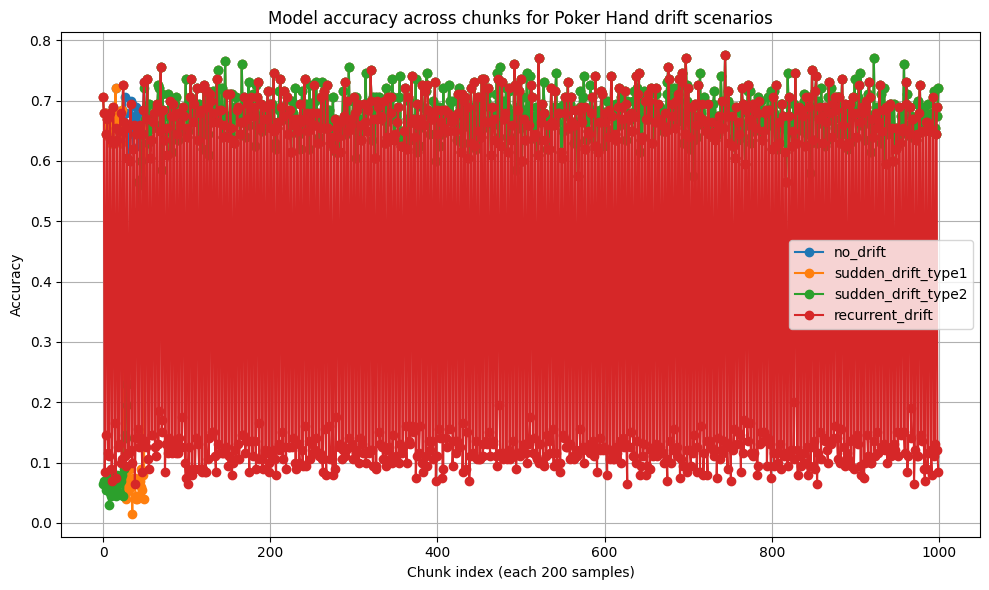

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# ===================================================
# assume these POKER drift dataframes already exist:
# df_nodrift, df_sudden_type1, df_sudden_type2, df_recurrent
# ===================================================
datasets = {
    "no_drift": df_nodrift,
    "sudden_drift_type1": df_sudden_type1,
    "sudden_drift_type2": df_sudden_type2,
    "recurrent_drift": df_recurrent,
}

# ===================================================
# define features and target (POKER HAND)
# ===================================================
features = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']
target = "CLASS"   # 0..9 (10-way)

chunk_size = 200

# ===================================================
# load main poker dataset and train model
# ===================================================
# NOTE: df should be your base dataset (e.g., df_nodrift)
df = df_nodrift.copy()

X = df[features].values
y = df[target].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# model (same architecture)
model = MLPClassifier(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)
model.fit(X_train, y_train)

# quick base test accuracy (optional)
y_test_pred = model.predict(X_test)
print("Base test accuracy (no_drift split):", accuracy_score(y_test, y_test_pred))

# ===================================================
# Evaluate trained model on each drift dataset
# ===================================================
plt.figure(figsize=(10, 6))

for name, df_mod in datasets.items():
    X_mod = df_mod[features].values
    y_mod = df_mod[target].values

    # scale using same scaler from training
    X_mod_scaled = scaler.transform(X_mod)

    # predict
    y_pred = model.predict(X_mod_scaled)

    # chunk-wise accuracy
    n_samples = len(X_mod_scaled)
    n_chunks = n_samples // chunk_size
    accs = []

    for i in range(n_chunks):
        start, end = i * chunk_size, (i + 1) * chunk_size
        y_true_chunk = y_mod[start:end]
        y_pred_chunk = y_pred[start:end]
        if len(y_true_chunk) == 0:
            continue
        accs.append(accuracy_score(y_true_chunk, y_pred_chunk))

    plt.plot(range(len(accs)), accs, marker='o', label=name)

# ===================================================
# Plot results
# ===================================================
plt.title("Model accuracy across chunks for Poker Hand drift scenarios")
plt.xlabel(f"Chunk index (each {chunk_size} samples)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ============================================================
# POKER HAND ANN: Train + Predict + Save Predictions (Like Weather Code)
# Uses df_sudden_type1 (Poker drift dataframe) and saves CSV
# ============================================================

# === Load your dataset (Poker drift dataframe) ===
df = df_sudden_type1.copy()   # must contain S1,C1,...,S5,C5 and CLASS

# === Define features and target (Poker) ===
features = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']
target = "CLASS"

# === Drop missing values (kept for consistency) ===
df = df.dropna()

# === Split features and target ===
X = df[features]
y = df[target].astype(int)   # Poker labels are 0..9

# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Feature Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ============================================================
# Build ANN Model (Multi-class Poker: 10-way softmax)
# (Matches the "current format/current model" you used earlier)
# ============================================================
num_classes = int(df[target].nunique())  # should be 10

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# === Compile Model ===
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# === Train Model ===
history = model.fit(
    X_train_scaled, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# === Predict ===
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1).astype(int)

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ============================================================
# Save results (features + true label + predicted label)
# ============================================================
df_results = pd.DataFrame(X_test.values, columns=features)
df_results["true_class"] = y_test.values
df_results["predicted_class"] = y_pred

# Optional: also store max confidence
df_results["pred_confidence"] = np.max(y_pred_prob, axis=1)

# === Save results ===
out_file = "poker_ann_predictions.csv"
df_results.to_csv(out_file, index=False)
print(f"\nPredictions saved to: {out_file}")

# === Preview ===
print("\nSample predictions:")
print(df_results.head())


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.4857 - loss: 1.1412 - val_accuracy: 0.5278 - val_loss: 0.9854
Epoch 2/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5274 - loss: 1.0032 - val_accuracy: 0.5307 - val_loss: 0.9761
Epoch 3/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5347 - loss: 0.9870 - val_accuracy: 0.5445 - val_loss: 0.9640
Epoch 4/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5394 - loss: 0.9797 - val_accuracy: 0.5476 - val_loss: 0.9545
Epoch 5/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5508 - loss: 0.9684 - val_accuracy: 0.5618 - val_loss: 0.9442
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Confusion Matrix:
[[23413  5845     1     7    16     1    26     0     0    20]
 [14463 10332     1    14    20     0    28     0     0    28]
 [ 1226  1539     0    26    31     1    49     1     1    53]
 [  320   949     0    21    38     0    40     2     1    42]
 [    1   235     1    33    44     0    48    

Surrogate accuracy vs. black-box predictions: 0.6697


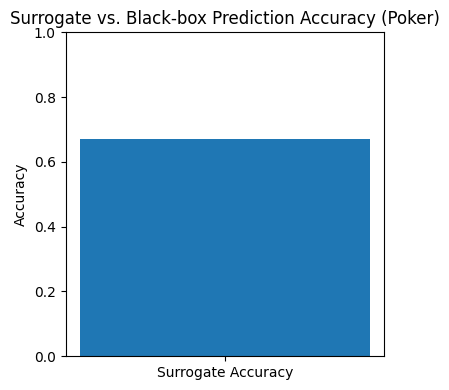

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
# =======================================================
# POKER: SURROGATE MODEL (Decision Tree for explainability)
# =======================================================
# Assumes:
# - df_results exists from your poker ANN code
# - features = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']
# - df_results has columns: predicted_class (already numeric 0..9 in our poker pipeline)
X_surrogate = df_results[features].values
# For poker, predicted_class is already numeric. We keep LabelEncoder only for safety/consistency.
le_sur = LabelEncoder()
y_surrogate = le_sur.fit_transform(df_results["predicted_class"].astype(int))
# Train surrogate (interpretable model)
surrogate_model = DecisionTreeClassifier(max_depth=4, random_state=42)
surrogate_model.fit(X_surrogate, y_surrogate)
# Evaluate surrogate fidelity (how well it imitates black-box predictions)
y_surrogate_pred = surrogate_model.predict(X_surrogate)
acc = accuracy_score(y_surrogate, y_surrogate_pred)
print(f"Surrogate accuracy vs. black-box predictions: {acc:.4f}")
# =======================================================
# PLOT: Surrogate fidelity bar
# =======================================================
plt.figure(figsize=(4, 4))
plt.bar(['Surrogate Accuracy'], [acc])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Surrogate vs. Black-box Prediction Accuracy (Poker)')
plt.tight_layout()
plt.show()

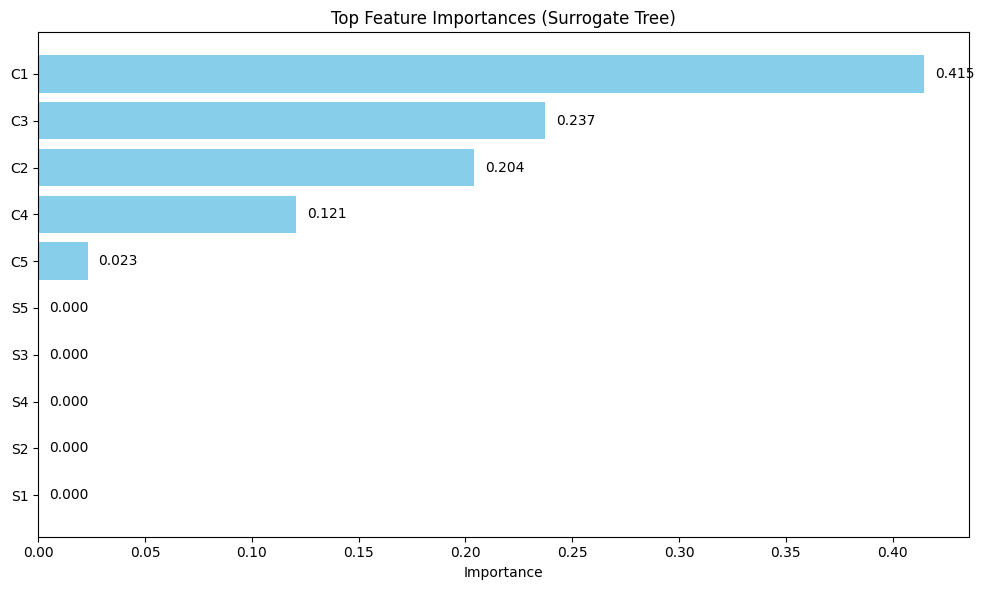

In [ ]:
# =======================================================
# === PLOT 2: Top Feature Importances from surrogate
# =======================================================
importances = surrogate_model.feature_importances_
indices = np.argsort(importances)[::-1]  # sort descending
top_n = min(10, len(features))
top_indices = indices[:top_n]
top_features = [features[i] for i in top_indices]
top_importances = importances[top_indices]

plt.figure(figsize=(10, 6))
bars = plt.barh(range(top_n), top_importances[::-1], color='skyblue')
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel('Importance')
plt.title('Top Feature Importances (Surrogate Tree)')

# Add numerical values to bars
for i, b in enumerate(bars):
    width = b.get_width()
    plt.text(width + 0.005, b.get_y() + b.get_height()/2,
             f"{top_importances[::-1][i]:.3f}", va='center')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
# === Get feature importances from the trained surrogate model ===
importances = surrogate_model.feature_importances_
# === Build DataFrame of all features with their importances ===
df_baseline_importance = pd.DataFrame({
    'feature': features,
    'importance': importances
})
# === Sort in descending order ===
df_baseline_importance = df_baseline_importance.sort_values(
    by='importance', ascending=False
).reset_index(drop=True)
# === Select top 10 features ===
df_baseline_top10 = df_baseline_importance.head(10)
# === Display top 10 ===
print(df_baseline_top10)

  feature  importance
0      C1    0.414801
1      C3    0.237273
2      C2    0.204182
3      C4    0.120713
4      C5    0.023031
5      S1    0.000000
6      S3    0.000000
7      S2    0.000000
8      S4    0.000000
9      S5    0.000000


**Base Statistics**
---

In [ ]:
import pandas as pd
import numpy as np

# --- Configuration ---
block_size = 50  # Number of samples per block

# Poker features
selected_cols = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']

# Make a copy of the poker dataset (use your base poker df, e.g., df_nodrift or df_sudden_type1)
df_tmp = df.copy()   # <-- ensure df is your poker dataframe
df_tmp = df_tmp.dropna()

# Assign block index
df_tmp['block'] = df_tmp.index // block_size

# Check if all columns exist
cols_to_use = [c for c in selected_cols if c in df_tmp.columns]
if len(cols_to_use) < len(selected_cols):
    missing = [c for c in selected_cols if c not in df_tmp.columns]
    print("Warning: missing poker columns skipped:", missing)

# Ensure numeric (Poker should be int, but keep safe)
for c in cols_to_use:
    df_tmp[c] = pd.to_numeric(df_tmp[c], errors='coerce')

df_tmp = df_tmp.dropna(subset=cols_to_use)

# Compute mean, variance, and standard deviation per block
df_baseline_stats = (
    df_tmp
    .groupby('block')[cols_to_use]
    .agg(['mean', 'var', 'std'])
)

# Flatten MultiIndex column names (e.g., S1_mean, C1_var, ...)
df_baseline_stats.columns = [f"{col}_{stat}" for col, stat in df_baseline_stats.columns]

# Reset index so 'block' becomes a column
df_baseline_stats = df_baseline_stats.reset_index()

# Save to CSV
df_baseline_stats.to_csv("poker_baseline_stats.csv", index=False)

# Display the resulting DataFrame
df_baseline_stats


,block,S1_mean,S1_var,S1_std,C1_mean,C1_var,C1_std,S2_mean,S2_var,S2_std,...,S4_std,C4_mean,C4_var,C4_std,S5_mean,S5_var,S5_std,C5_mean,C5_var,C5_std
0,0,2.72,1.144490,1.069808,6.20,13.591837,3.686711,2.34,1.086122,1.042172,...,1.108225,6.10,12.173469,3.489050,2.38,1.342449,1.158641,6.22,12.583265,3.547290
1,1,2.64,1.133061,1.064453,6.48,13.152653,3.626659,2.66,1.290204,1.135872,...,1.088718,6.34,14.800408,3.847130,2.54,1.273878,1.128662,8.26,15.216735,3.900863
2,2,2.34,1.331020,1.153699,7.76,14.757551,3.841556,2.46,1.233061,1.110433,...,1.135872,6.58,15.840408,3.980001,2.56,1.312653,1.145711,8.02,16.305714,4.038033
3,3,2.54,1.273878,1.128662,7.30,15.234694,3.903165,2.90,1.030612,1.015191,...,1.069045,8.58,17.187347,4.145763,2.28,1.103673,1.050559,7.74,16.400408,4.049742
4,4,2.28,1.185306,1.088718,6.74,10.400408,3.224966,2.46,1.192245,1.091900,...,1.090965,8.04,15.345306,3.917309,2.58,1.268980,1.126490,6.84,15.361633,3.919392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,2.60,1.469388,1.212183,6.46,13.477959,3.671234,2.72,1.022041,1.010960,...,1.182353,6.72,14.205714,3.769047,2.50,1.602041,1.265718,6.64,13.459592,3.668732
3996,3996,2.50,1.193878,1.092647,6.78,15.889388,3.986149,2.48,1.275102,1.129204,...,1.179588,6.92,12.360816,3.515795,2.18,1.334286,1.155113,6.48,17.928163,4.234166
3997,3997,2.58,1.513878,1.230397,6.40,13.551020,3.681171,2.38,1.383265,1.176123,...,0.951047,7.58,16.820000,4.101219,2.32,1.364898,1.168288,6.80,11.306122,3.362458
3998,3998,2.74,1.175918,1.084398,7.68,14.630204,3.824945,2.42,1.146531,1.070762,...,1.072095,6.44,16.945306,4.116468,2.50,1.316327,1.147313,6.30,15.928571,3.991061


**New Data Statictsics**
---

In [ ]:
import pandas as pd
import numpy as np

# --- Configuration ---
block_size = 50  # samples per block
selected_cols = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']

# --- Combine all poker drift datasets into one ---
df_all = pd.concat(
    [df_sudden_type1, df_sudden_type2, df_recurrent],
    axis=0,
    ignore_index=True
)

# --- Drop missing values (safe) ---
df_all = df_all.dropna()

# --- Assign block IDs ---
df_all['block'] = df_all.index // block_size

# --- Filter only available columns ---
cols_to_use = [c for c in selected_cols if c in df_all.columns]
if len(cols_to_use) < len(selected_cols):
    missing = [c for c in selected_cols if c not in df_all.columns]
    print("⚠️ Warning: missing poker columns skipped:", missing)

# --- Ensure numeric (Poker should be int, but keep safe) ---
for c in cols_to_use:
    df_all[c] = pd.to_numeric(df_all[c], errors='coerce')

df_all = df_all.dropna(subset=cols_to_use)

# --- Compute mean/variance/std for each block ---
df_all_stats = (
    df_all
    .groupby('block')[cols_to_use]
    .agg(['mean', 'var', 'std'])
)

# --- Flatten multi-level column names ---
df_all_stats.columns = [f"{col}_{stat}" for col, stat in df_all_stats.columns]

# --- Reset index so 'block' becomes a column ---
df_all_stats = df_all_stats.reset_index()

# --- Save results ---
df_all_stats.to_csv("poker_all_drift_stats.csv", index=False)
print("✅ Combined drift statistics saved to poker_all_drift_stats.csv")

# --- Display preview ---
df_all_stats.head()


✅ Combined drift statistics saved to poker_all_drift_stats.csv


,block,S1_mean,S1_var,S1_std,C1_mean,C1_var,C1_std,S2_mean,S2_var,S2_std,...,S4_std,C4_mean,C4_var,C4_std,S5_mean,S5_var,S5_std,C5_mean,C5_var,C5_std
0,0,2.72,1.144490,1.069808,6.20,13.591837,3.686711,2.34,1.086122,1.042172,...,1.108225,6.10,12.173469,3.489050,2.38,1.342449,1.158641,6.22,12.583265,3.547290
1,1,2.64,1.133061,1.064453,6.48,13.152653,3.626659,2.66,1.290204,1.135872,...,1.088718,6.34,14.800408,3.847130,2.54,1.273878,1.128662,8.26,15.216735,3.900863
2,2,2.34,1.331020,1.153699,7.76,14.757551,3.841556,2.46,1.233061,1.110433,...,1.135872,6.58,15.840408,3.980001,2.56,1.312653,1.145711,8.02,16.305714,4.038033
3,3,2.54,1.273878,1.128662,7.30,15.234694,3.903165,2.90,1.030612,1.015191,...,1.069045,8.58,17.187347,4.145763,2.28,1.103673,1.050559,7.74,16.400408,4.049742
4,4,2.28,1.185306,1.088718,6.74,10.400408,3.224966,2.46,1.192245,1.091900,...,1.090965,8.04,15.345306,3.917309,2.58,1.268980,1.126490,6.84,15.361633,3.919392


In [ ]:
import pandas as pd
import numpy as np

# ============================================================
# Load pre-computed statistics for weather dataset
# ============================================================
df_baseline = pd.read_csv("poker_baseline_stats.csv")
df_drifted  = pd.read_csv("poker_all_drift_stats.csv")

# ============================================================
# Baseline reference vector: mean across all baseline blocks
# ============================================================
baseline_row = df_baseline.mean()

# ============================================================
# Collect all columns except 'block'
# ============================================================
cols = [c for c in df_baseline.columns if c != 'block']
base_features = sorted(set(col.rsplit('_', 1)[0] for col in cols))

records = []

# ============================================================
# Compute FDDS block-wise (correct formula)
# FDDS_j = (μb-μw)^2 + (vb+vw-2√(vb·vw))
# ============================================================
for idx, drift_row in df_drifted.iterrows():
    block_id = drift_row.get("block", idx)
    row_result = {"block": block_id}

    for base in base_features:
        mean_b = baseline_row.get(f"{base}_mean", np.nan)
        var_b  = baseline_row.get(f"{base}_var", np.nan)

        if pd.isna(var_b):
            std_b = baseline_row.get(f"{base}_std", np.nan)
            var_b = std_b**2 if not pd.isna(std_b) else np.nan

        mean_w = drift_row.get(f"{base}_mean", np.nan)
        var_w  = drift_row.get(f"{base}_var", np.nan)

        if pd.isna(var_w):
            std_w = drift_row.get(f"{base}_std", np.nan)
            var_w = std_w**2 if not pd.isna(std_w) else np.nan

        if pd.isna(mean_b) or pd.isna(mean_w) or pd.isna(var_b) or pd.isna(var_w):
            row_result[base] = np.nan
        else:
            d = (mean_b - mean_w)**2 + (var_b + var_w - 2*np.sqrt(var_b * var_w))
            row_result[base] = d

    records.append(row_result)

df_fdds_vector = pd.DataFrame(records)

df_fdds_vector.to_csv("weather_fdds_vector.csv", index=False)

print("✅ Weather FDDS vector saved.")
df_fdds_vector.head()


✅ Weather FDDS vector saved.


,block,C1,C2,C3,C4,C5,S1,S2,S3,S4,S5
0,0.0,2.646541,3.230735,2.814343,3.158990,2.665295,0.141827,0.223820,0.219685,0.139853,0.068323
1,1.0,2.193831,1.925950,1.147904,1.846131,1.511669,0.134105,0.085529,0.064716,0.128719,0.108869
2,2.0,1.041558,0.875695,2.028411,1.190569,0.924288,0.147462,0.123951,0.234450,0.159632,0.105823
3,3.0,0.801309,1.675465,1.440021,1.788387,0.610944,0.094886,0.247872,0.091679,0.174627,0.147511
4,4.0,2.885894,1.202886,1.382336,1.096822,0.910583,0.223191,0.135963,0.076363,0.117631,0.124133


In [ ]:
import pandas as pd

# ============================================================
# Load supporting data (already created previously)
# ============================================================
# df_fdds_vector     → per-feature FDDS values from Cell 1 (e.g., weather_fdds_vector)
# df_baseline_top10  → Top 10 surrogate feature importances (already loaded earlier)

# If needed to reload from files (optional):
# df_fdds_vector    = pd.read_csv("weather_fdds_vector.csv")
# df_baseline_top10 = pd.read_csv("weather_baseline_top10.csv")

# ============================================================
# Convert top-10 importance DataFrame into dictionary
# ============================================================
importance_dict = dict(zip(df_baseline_top10["feature"], df_baseline_top10["importance"]))

# Make a working copy of the FDDS vector
df_drift_exposure = df_fdds_vector.copy()

# ============================================================
# Compute MLS Drift Exposure Score (weighted FDDS) per block
# Same structure as your electricity code
# ============================================================
des_values = []

for idx, row in df_drift_exposure.iterrows():
    des_total = 0.0
    for feature_name, importance in importance_dict.items():
        # Match all feature columns corresponding to this base feature
        matching_cols = [c for c in df_drift_exposure.columns if c.startswith(feature_name)]
        for col in matching_cols:
            des_total += importance * row[col]
    des_values.append(des_total)

# Store the final weighted score (keep your naming exactly)
df_drift_exposure["FDDS"] = des_values

# ============================================================
# Save the results
# ============================================================
df_drift_exposure.to_csv("poke_drift_exposure_scores.csv", index=False)

print("✅ MLS Drift Exposure Scores computed and saved to poke_drift_exposure_scores.csv")
print(df_drift_exposure[["block", "FDDS"]].head())


✅ MLS Drift Exposure Scores computed and saved to poke_drift_exposure_scores.csv
   block      FDDS
0    0.0  2.867929
1    1.0  1.833282
2    2.0  1.257132
3    3.0  1.246114
4    4.0  1.924042


In [ ]:
df_baseline_top10

,feature,importance
0,C1,0.414801
1,C3,0.237273
2,C2,0.204182
3,C4,0.120713
4,C5,0.023031
5,S1,0.000000
6,S3,0.000000
7,S2,0.000000
8,S4,0.000000
9,S5,0.000000


In [ ]:
df_drift_exposure.to_csv("df_fdds_poke.csv")

<Axes: >

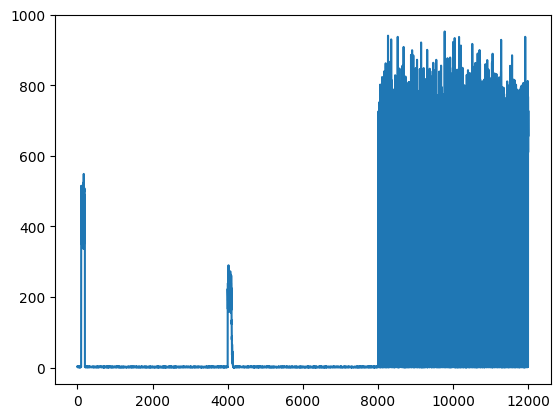

In [ ]:
df_drift_exposure["FDDS"].plot()

In [ ]:
import pandas as pd
import numpy as np

# ============================================================
# Poker Drift Summary from Drift Exposure Scores
# Assumes df_drift_exposure is already in memory
# (created from poker_drift_exposure_scores.csv)
# If needed:
# df_drift_exposure = pd.read_csv("poker_drift_exposure_scores.csv")
# ============================================================

# -----------------------------
# Configuration
# -----------------------------
block_group_size = 5     # Number of blocks per group
threshold_scaled = 0.7   # Scaled drift threshold (0–1 range)

# -----------------------------
# Step 1: Assign group IDs
# -----------------------------
df_drift_exposure = df_drift_exposure.copy()
df_drift_exposure["block_group"] = (df_drift_exposure["block"] // block_group_size).astype(int)

# -----------------------------
# Step 2: Aggregate by group — average DES per block group
# -----------------------------
group_results = []
for group_id, subset in df_drift_exposure.groupby("block_group"):
    avg_des = subset["FDDS"].mean()
    group_results.append({
        "block_group": group_id,
        "block_range": f"{int(subset['block'].min())}-{int(subset['block'].max())}",
        "total_blocks": int(len(subset)),
        "avg_FDDS": float(avg_des)
    })

df_summary = pd.DataFrame(group_results)

# -----------------------------
# Step 3: Scale avg_DES into [0, 1]
# -----------------------------
min_val = df_summary["avg_FDDS"].min()
max_val = df_summary["avg_FDDS"].max()

# Safe scaling (avoids divide-by-zero if all values equal)
if max_val - min_val == 0:
    df_summary["avg_FDDS_scaled"] = 0.0
else:
    df_summary["avg_FDDS_scaled"] = (df_summary["avg_FDDS"] - min_val) / (max_val - min_val)

# -----------------------------
# Step 4: Determine drift type
# -----------------------------
df_summary["final_drift"] = np.where(
    df_summary["avg_FDDS_scaled"] > threshold_scaled,
    "REAL_DRIFT",
    "PSEUDO_DRIFT"
)

# -----------------------------
# Save and display
# -----------------------------
df_summary.to_csv("poker_drift_summary.csv", index=False)

print("✅ Drift summary saved to poker_drift_summary.csv")
print(df_summary)


✅ Drift summary saved to poker_drift_summary.csv
      block_group  block_range  total_blocks    avg_FDDS  avg_FDDS_scaled  \
0               0          0-4             5    1.825700         0.001584   
1               1          5-9             5    1.777028         0.001523   
2               2        10-14             5    1.886535         0.001659   
3               3        15-19             5    1.204388         0.000811   
4               4        20-24             5    1.478920         0.001152   
...           ...          ...           ...         ...              ...   
2395         2395  11975-11979             5  566.548036         0.704110   
2396         2396  11980-11984             5  560.531283         0.696625   
2397         2397  11985-11989             5    1.916378         0.001697   
2398         2398  11990-11994             5  443.038792         0.550462   
2399         2399  11995-11999             5  674.491623         0.838394   

       final_drift  
0    

In [ ]:
df_summary.to_csv("MDDP_5_poke.csv", index=False)

<Axes: >

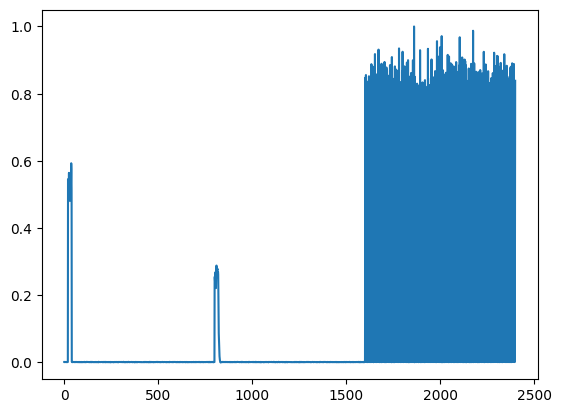

In [ ]:
df_summary['avg_FDDS_scaled'].plot()

In [ ]:
df_summary['final_drift'].value_counts()

,count
final_drift,
PSEUDO_DRIFT,2171
REAL_DRIFT,229


In [ ]:
df_all

,Unnamed: 0,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS,drift_type,block
0,8.615510e+05,3.000000,11.000000,3.000000,4.000000,2.000000,11.000000,1.000000,1.000000,1.000000,2.000000,1,sudden_type1,0
1,1.948890e+05,1.000000,1.000000,1.000000,7.000000,1.000000,4.000000,1.000000,12.000000,3.000000,5.000000,0,sudden_type1,0
2,5.388540e+05,4.000000,9.000000,4.000000,4.000000,1.000000,3.000000,2.000000,1.000000,2.000000,13.000000,0,sudden_type1,0
3,1.087660e+05,4.000000,6.000000,2.000000,11.000000,2.000000,2.000000,1.000000,8.000000,3.000000,2.000000,1,sudden_type1,0
4,7.916130e+05,2.000000,5.000000,3.000000,11.000000,4.000000,11.000000,3.000000,2.000000,3.000000,4.000000,1,sudden_type1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,-1.151159e+06,-1.328935,-24.592244,11.938959,-9.571867,-5.234221,-25.401419,1.415036,-2.751169,-8.212026,31.292830,1,recurrent,11999
599996,-3.006179e+06,-4.120227,-2.228788,-5.036415,-18.732940,-4.522004,18.491464,-4.978621,19.947098,-6.933500,10.295009,9,recurrent,11999
599997,-3.903237e+06,9.521943,-24.736476,-8.602415,21.296008,-1.544984,-47.924788,5.312660,23.690984,0.997549,-34.860399,8,recurrent,11999
599998,-9.370476e+05,-1.501613,-22.194412,5.003653,-35.901058,4.792424,-27.477809,-4.622252,32.133923,-14.906940,-11.789816,2,recurrent,11999


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# ============================================================
# Configuration (POKER)
# ============================================================
features = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']
target = "CLASS"
block_window = 5  # evaluate every 5 consecutive blocks

# ============================================================
# Input DataFrame (combined drift dataset)
# ============================================================
df_tmp = df_all.copy()   # df_all is your combined POKER drift dataset (must already have 'block')
df_tmp = df_tmp.dropna().sort_values(by="block").reset_index(drop=True)

# Ensure target is integer labels (0..9)
df_tmp[target] = df_tmp[target].astype(int)

# ============================================================
# Evaluate model performance per 5-block chunk
# ============================================================
accuracies = []
block_ids = sorted(df_tmp["block"].unique())

for i in range(0, len(block_ids), block_window):
    block_chunk = block_ids[i:i + block_window]
    df_chunk = df_tmp[df_tmp["block"].isin(block_chunk)]
    if df_chunk.empty:
        continue

    # Prepare feature and label arrays
    X_chunk = df_chunk[features].values
    y_chunk = df_chunk[target].values

    # Scale using the same fitted scaler used during training
    X_chunk_scaled = scaler.transform(pd.DataFrame(X_chunk, columns=features))

    # Predict with Keras model (multi-class softmax)
    y_pred_prob = model.predict(X_chunk_scaled)
    y_pred = np.argmax(y_pred_prob, axis=1).astype(int)

    # Accuracy
    accuracy = accuracy_score(y_chunk, y_pred)

    accuracies.append({
        "block_range": f"{int(block_chunk[0])}-{int(block_chunk[-1])}",
        "total_blocks": int(len(block_chunk)),
        "accuracy": float(accuracy)
    })

# ============================================================
# Build summary DataFrame
# ============================================================
df_accuracies = pd.DataFrame(accuracies)

# Save for later drift comparison (ground truth)
df_accuracies.to_csv("poker_blockwise_accuracies.csv", index=False)

print("✅ Block-wise accuracy ground truth saved to poker_blockwise_accuracies.csv")
print(df_accuracies.head())


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━

In [ ]:
df_accuracies

,block_range,total_blocks,accuracy
0,0-4,5,0.600
1,5-9,5,0.532
2,10-14,5,0.580
3,15-19,5,0.536
4,20-24,5,0.600
...,...,...,...
2395,11975-11979,5,0.172
2396,11980-11984,5,0.148
2397,11985-11989,5,0.600
2398,11990-11994,5,0.316


In [ ]:
df_accuracies.to_csv("Ground_5_poke.csv")

In [ ]:
import numpy as np
# Assume df is your dataframe with 'accuracy'
df_accuracies["Ground truth"] = np.where(df_accuracies["accuracy"] > 0.50, "PSEUDO_DRIFT", "REAL_DRIFT")
df_accuracies

,block_range,total_blocks,accuracy,Ground truth
0,0-4,5,0.600,PSEUDO_DRIFT
1,5-9,5,0.532,PSEUDO_DRIFT
2,10-14,5,0.580,PSEUDO_DRIFT
3,15-19,5,0.536,PSEUDO_DRIFT
4,20-24,5,0.600,PSEUDO_DRIFT
...,...,...,...,...
2395,11975-11979,5,0.172,REAL_DRIFT
2396,11980-11984,5,0.148,REAL_DRIFT
2397,11985-11989,5,0.600,PSEUDO_DRIFT
2398,11990-11994,5,0.316,REAL_DRIFT


<Axes: >

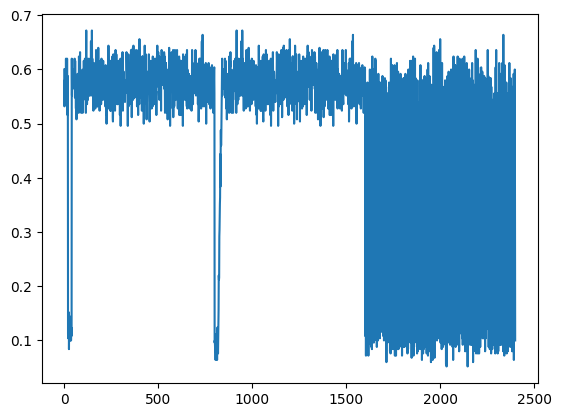

In [ ]:
df_accuracies["accuracy"].plot()

In [ ]:
df_accuracies['Ground truth'].value_counts()

,count
Ground truth,
PSEUDO_DRIFT,1749
REAL_DRIFT,651


In [ ]:
df_summary["final_drift"].value_counts()

,count
final_drift,
PSEUDO_DRIFT,1883
REAL_DRIFT,517


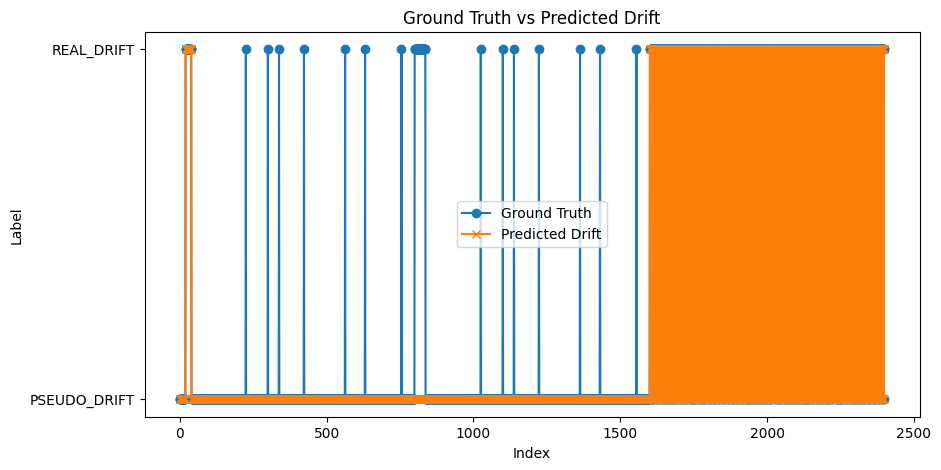

In [ ]:
import matplotlib.pyplot as plt
y_true = df_accuracies["Ground truth"][:]
y_pred = df_summary["final_drift"][:]
plt.figure(figsize=(10,5))
plt.plot(y_true.values, label="Ground Truth", marker='o')
plt.plot(y_pred.values, label="Predicted Drift", marker='x')
plt.xlabel("Index")
plt.ylabel("Label")
plt.title("Ground Truth vs Predicted Drift")
plt.legend()
plt.show()

0.7

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Example: assume your dataframe has columns 'actual' and 'predicted'
y_true = df_accuracies["Ground truth"][:]
y_pred = df_summary["final_drift"][:]
# Basic metrics
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred, average="weighted")   # use 'macro' or 'micro' if needed
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Detailed report (per class precision, recall, f1)
report = classification_report(y_true, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.8241666666666667
F1 Score: 0.7914711270871986
Precision: 0.8583452326116996
Recall: 0.8241666666666667
Confusion Matrix:
 [[1749    0]
 [ 422  229]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.81      1.00      0.89      1749
  REAL_DRIFT       1.00      0.35      0.52       651

    accuracy                           0.82      2400
   macro avg       0.90      0.68      0.71      2400
weighted avg       0.86      0.82      0.79      2400



0.5

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Example: assume your dataframe has columns 'actual' and 'predicted'
y_true = df_accuracies["Ground truth"][:]
y_pred = df_summary["final_drift"][:]
# Basic metrics
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred, average="weighted")   # use 'macro' or 'micro' if needed
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Detailed report (per class precision, recall, f1)
report = classification_report(y_true, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.8804166666666666
F1 Score: 0.8680437981141529
Precision: 0.8972734528487228
Recall: 0.8804166666666666
Confusion Matrix:
 [[1749    0]
 [ 287  364]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.86      1.00      0.92      1749
  REAL_DRIFT       1.00      0.56      0.72       651

    accuracy                           0.88      2400
   macro avg       0.93      0.78      0.82      2400
weighted avg       0.90      0.88      0.87      2400



0.3

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Example: assume your dataframe has columns 'actual' and 'predicted'
y_true = df_accuracies["Ground truth"][:]
y_pred = df_summary["final_drift"][:]
# Basic metrics
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred, average="weighted")   # use 'macro' or 'micro' if needed
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Detailed report (per class precision, recall, f1)
report = classification_report(y_true, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.9441666666666667
F1 Score: 0.941993863526643
Precision: 0.9481399362719064
Recall: 0.9441666666666667
Confusion Matrix:
 [[1749    0]
 [ 134  517]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.93      1.00      0.96      1749
  REAL_DRIFT       1.00      0.79      0.89       651

    accuracy                           0.94      2400
   macro avg       0.96      0.90      0.92      2400
weighted avg       0.95      0.94      0.94      2400



In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df_all.to_csv("/content/drive/My Drive/Early Drift Detection/Drifted_poker_data.csv", index=False)

Mounted at /content/drive


**ADWIN Weather**
---

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
# Define the paths to your datasets in Google Drive
import numpy as np
df_all=pd.read_csv("/content/drive/My Drive/Early Drift Detection/Drifted_poker_data.csv")
df_all

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS,drift_type,block
0,8.615510e+05,3.000000,11.000000,3.000000,4.000000,2.000000,11.000000,1.000000,1.000000,1.000000,2.000000,1,sudden_type1,0
1,1.948890e+05,1.000000,1.000000,1.000000,7.000000,1.000000,4.000000,1.000000,12.000000,3.000000,5.000000,0,sudden_type1,0
2,5.388540e+05,4.000000,9.000000,4.000000,4.000000,1.000000,3.000000,2.000000,1.000000,2.000000,13.000000,0,sudden_type1,0
3,1.087660e+05,4.000000,6.000000,2.000000,11.000000,2.000000,2.000000,1.000000,8.000000,3.000000,2.000000,1,sudden_type1,0
4,7.916130e+05,2.000000,5.000000,3.000000,11.000000,4.000000,11.000000,3.000000,2.000000,3.000000,4.000000,1,sudden_type1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,-1.151159e+06,-1.328935,-24.592244,11.938959,-9.571867,-5.234221,-25.401419,1.415036,-2.751169,-8.212026,31.292830,1,recurrent,11999
599996,-3.006179e+06,-4.120227,-2.228788,-5.036415,-18.732940,-4.522004,18.491464,-4.978621,19.947098,-6.933500,10.295009,9,recurrent,11999
599997,-3.903237e+06,9.521943,-24.736476,-8.602415,21.296008,-1.544984,-47.924788,5.312660,23.690984,0.997549,-34.860399,8,recurrent,11999
599998,-9.370476e+05,-1.501613,-22.194412,5.003653,-35.901058,4.792424,-27.477809,-4.622252,32.133923,-14.906940,-11.789816,2,recurrent,11999


In [ ]:
import numpy as np
import pandas as pd

# ==========================================================
# VARIANCE-AWARE ADWIN DRIFT DETECTOR
# ==========================================================
def adwin_detector_single_feature(data_stream, delta=0.002, min_window=10):
    """
    ADWIN for single feature — variance-aware.
    Returns drift scores (0–1) combining mean + variance shift effects.
    """
    window = []
    drift_scores = np.zeros(len(data_stream))

    for i, value in enumerate(data_stream):
        window.append(value)

        if len(window) < min_window:
            continue

        n = len(window)
        split_points = [int(0.3 * n), int(0.5 * n), int(0.7 * n)]
        max_drift_score = 0

        for split_point in split_points:
            if split_point < 5 or (n - split_point) < 5:
                continue

            w0 = np.array(window[:split_point])
            w1 = np.array(window[split_point:])

            n0, n1 = len(w0), len(w1)
            m = 1.0 / (1.0 / n0 + 1.0 / n1)

            mean0, mean1 = np.mean(w0), np.mean(w1)
            var0, var1 = np.var(w0), np.var(w1)

            pooled_var = ((n0 - 1) * var0 + (n1 - 1) * var1) / max((n0 + n1 - 2), 1)
            δ_prime = max(delta / n, 1e-12)
            log_term = np.log(2.0 / δ_prime)

            eps_var = np.sqrt((2.0 / m) * pooled_var * log_term) + (2.0 / (3.0 * m)) * log_term

            # components
            mean_diff = abs(mean0 - mean1)
            var_diff = abs(np.sqrt(var0 + 1e-12) - np.sqrt(var1 + 1e-12))

            drift_mag = np.sqrt(mean_diff**2 + var_diff**2)

            drift_score = min(1.0, drift_mag / (eps_var + 1e-8))
            max_drift_score = max(max_drift_score, drift_score)

            # adaptive window shrink
            if drift_score > 0.7:
                window = w1.tolist()
                break

        drift_scores[i] = max_drift_score

        # rolling window control
        if len(window) > 50:
            window = window[-25:]

    return drift_scores


def _minmax_scale_dict(value_dict):
    """Scale dict values to [0,1] with min–max; handle degenerate case."""
    vals = np.array(list(value_dict.values()), dtype=float)
    vmin, vmax = float(np.min(vals)), float(np.max(vals))
    denom = vmax - vmin
    if denom <= 1e-12:
        return {k: 0.0 for k in value_dict}  # all equal
    return {k: (v - vmin) / denom for k, v in value_dict.items()}


# ==================== BLOCKWISE COMBINATION (ADWIN ONLY) ====================
def combine_adwin_drift_scores_blockwise(
    df,
    adwin_scores_dict,
    adwin_threshold=0.6,
    block_size=5,
    use_scaled_threshold=True,
):
    """
    Combine ADWIN drift scores from all features using block averages.
    1) Compute raw block means of ADWIN scores (per block, across features)
    2) Min–max scale block means to [0,1]
    3) Classify each block using the SCALED mean vs adwin_threshold (if use_scaled_threshold=True)
    """
    df = df.copy()
    if "block" not in df.columns:
        raise KeyError("Input DataFrame must contain a 'block' column.")

    df["block_group"] = (df["block"] // block_size).astype(int)

    adwin_block_means = {}

    # First pass: compute raw block means
    for group_id, group_df in df.groupby("block_group"):
        idx = group_df.index
        # mean over features, each feature mean over indices in this block
        per_feature_means = [np.mean(adwin_scores_dict[col][idx]) for col in adwin_scores_dict]
        adwin_block_means[group_id] = float(np.mean(per_feature_means))

    # Second pass: scale raw means to [0,1]
    adwin_block_means_scaled = _minmax_scale_dict(adwin_block_means)

    # Choose which value to compare to threshold
    if use_scaled_threshold:
        label_source = adwin_block_means_scaled
        print("\n=== BLOCK-WISE ADWIN MEAN SCORES (scaled to [0,1]) ===")
    else:
        label_source = adwin_block_means
        print("\n=== BLOCK-WISE ADWIN MEAN SCORES (raw) ===")

    adwin_block_labels = {}
    for gid in sorted(adwin_block_means.keys()):
        raw_mean = adwin_block_means[gid]
        scaled_mean = adwin_block_means_scaled[gid]
        score_for_threshold = label_source[gid]

        label = "REAL_DRIFT" if score_for_threshold > adwin_threshold else "PSEUDO_DRIFT"
        adwin_block_labels[gid] = label

        print(
            f"Block {gid:3d}: Raw={raw_mean:.4f}  Scaled={scaled_mean:.4f}  "
            f"→ Using {'Scaled' if use_scaled_threshold else 'Raw'}={score_for_threshold:.4f}  → {label}"
        )

    # Map results to dataframe
    df["ADWIN_score_mean"] = df["block_group"].map(adwin_block_means)
    df["ADWIN_score_mean_scaled"] = df["block_group"].map(adwin_block_means_scaled)
    df["ADWIN_drift"] = df["block_group"].map(adwin_block_labels)

    return df


# ==================== MAIN FUNCTION ====================
def detect_adwin_drift_all_columns(
    df,
    feature_columns=None,
    adwin_threshold=0.6,
    block_size=5,
    use_scaled_threshold=True,
):
    """
    Detect ADWIN drift on all specified columns with block averaging.
    Block means are min–max scaled to [0,1] and the scaled scores are used for thresholding by default.
    """
    if feature_columns is None:
        exclude_cols = ['activity', 'drift_type', 'block']
        feature_columns = [
            col for col in df.columns
            if col not in exclude_cols and pd.api.types.is_numeric_dtype(df[col])
        ]

    print(f"Processing {len(feature_columns)} features: {feature_columns}")

    adwin_scores_dict = {}
    for col in feature_columns:
        print(f"Calculating ADWIN drift scores for {col}...")
        data = df[col].values
        adwin_scores_dict[col] = adwin_detector_single_feature(data)

    print("\nCombining ADWIN drift scores block-wise (with scaling)...")
    result_df = combine_adwin_drift_scores_blockwise(
        df.copy(),
        adwin_scores_dict,
        adwin_threshold=adwin_threshold,
        block_size=block_size,
        use_scaled_threshold=use_scaled_threshold,
    )

    adwin_real = (result_df['ADWIN_drift'] == 'REAL_DRIFT').sum()
    adwin_pseudo = (result_df['ADWIN_drift'] == 'PSEUDO_DRIFT').sum()

    print(f"\n=== ADWIN DRIFT DETECTION SUMMARY ===")
    print(f"REAL_DRIFT blocks: {adwin_real}")
    print(f"PSEUDO_DRIFT blocks: {adwin_pseudo}")
    print(f"Total blocks: {result_df['block_group'].nunique()}")

    return result_df


# ==================== SIMPLE USAGE ====================
def run_adwin_drift_detection(
    df_all,
    adwin_threshold=0.20,
    block_size=5,
    use_scaled_threshold=True,
):
    return detect_adwin_drift_all_columns(
        df_all,
        adwin_threshold=adwin_threshold,
        block_size=block_size,
        use_scaled_threshold=use_scaled_threshold,
    )

In [ ]:
df_all.columns

Index(['Unnamed: 0', 'S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5',
       'C5', 'CLASS', 'drift_type', 'block'],
      dtype='object')

In [ ]:
# ==================== RUN ADWIN DRIFT DETECTION ====================
result = detect_adwin_drift_all_columns(
    df_all,
    feature_columns=[
        'S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'
    ],
    adwin_threshold=0.30,  # threshold applied on scaled mean by default
    block_size=5,
    use_scaled_threshold=True  # ensures scaled values are used
)

# ==================== ANALYZE RESULTS ====================
print("\n--- Drift Counts ---")
print(result['ADWIN_drift'].value_counts())

# Inspect both raw and scaled block mean scores
print("\n--- Block Mean and Scaled Scores ---")
print(
    result[['block_group', 'ADWIN_score_mean', 'ADWIN_score_mean_scaled', 'ADWIN_drift']]
    .drop_duplicates()
    .head(20)
)
# ==================== SAVE RESULTS ====================
result.to_csv('adwin_drift_detection_results.csv', index=False)

Processing 10 features: ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5']
Calculating ADWIN drift scores for S1...
Calculating ADWIN drift scores for C1...
Calculating ADWIN drift scores for S2...
Calculating ADWIN drift scores for C2...
Calculating ADWIN drift scores for S3...
Calculating ADWIN drift scores for C3...
Calculating ADWIN drift scores for S4...
Calculating ADWIN drift scores for C4...
Calculating ADWIN drift scores for S5...
Calculating ADWIN drift scores for C5...

Combining ADWIN drift scores block-wise (with scaling)...

=== BLOCK-WISE ADWIN MEAN SCORES (scaled to [0,1]) ===
Block   0: Raw=0.2203  Scaled=0.0926  → Using Scaled=0.0926  → PSEUDO_DRIFT
Block   1: Raw=0.2161  Scaled=0.0608  → Using Scaled=0.0608  → PSEUDO_DRIFT
Block   2: Raw=0.2308  Scaled=0.1714  → Using Scaled=0.1714  → PSEUDO_DRIFT
Block   3: Raw=0.2338  Scaled=0.1940  → Using Scaled=0.1940  → PSEUDO_DRIFT
Block   4: Raw=0.2483  Scaled=0.3038  → Using Scaled=0.3038  → REAL_DRIFT
Block   5: R

<Axes: >

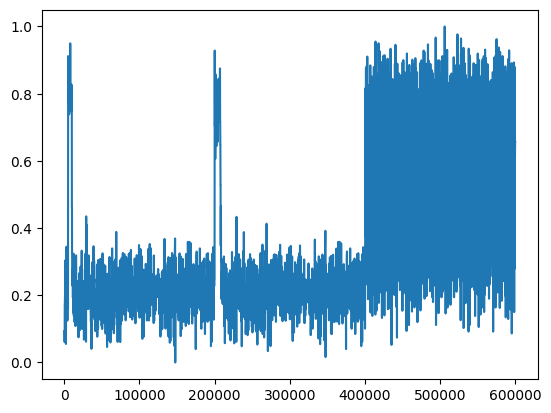

In [ ]:
result['ADWIN_score_mean_scaled'].plot()

In [ ]:
result['ADWIN_drift'].value_counts()

,count
ADWIN_drift,
PSEUDO_DRIFT,386000
REAL_DRIFT,214000


In [ ]:
def majority_drift(series):
    counts = series.value_counts()
    return counts.idxmax() if not counts.empty else "NO_DATA"
# Step 3: Aggregate per block_group
agg_results = result.groupby("block_group").agg({
    "ADWIN_drift": majority_drift
}).reset_index()
# Step 4: Add block range string
agg_results["block_range"] = agg_results["block_group"].apply(lambda g: f"{g*5}-{g*5+4}")
agg_results

,block_group,ADWIN_drift,block_range
0,0,PSEUDO_DRIFT,0-4
1,1,PSEUDO_DRIFT,5-9
2,2,PSEUDO_DRIFT,10-14
3,3,PSEUDO_DRIFT,15-19
4,4,REAL_DRIFT,20-24
...,...,...,...
2395,2395,REAL_DRIFT,11975-11979
2396,2396,REAL_DRIFT,11980-11984
2397,2397,PSEUDO_DRIFT,11985-11989
2398,2398,REAL_DRIFT,11990-11994


In [ ]:
df_accuracies = pd.read_csv("/content/poker_blockwise_accuracies.csv")
df_accuracies["Ground truth"] = np.where(df_accuracies["accuracy"] > 0.55, "PSEUDO_DRIFT", "REAL_DRIFT")
df_accuracies

,block_range,total_blocks,accuracy,Ground truth
0,0-4,5,0.608,PSEUDO_DRIFT
1,5-9,5,0.544,REAL_DRIFT
2,10-14,5,0.576,PSEUDO_DRIFT
3,15-19,5,0.516,REAL_DRIFT
4,20-24,5,0.584,PSEUDO_DRIFT
...,...,...,...,...
2395,11975-11979,5,0.208,REAL_DRIFT
2396,11980-11984,5,0.188,REAL_DRIFT
2397,11985-11989,5,0.592,PSEUDO_DRIFT
2398,11990-11994,5,0.292,REAL_DRIFT


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Example: assume your dataframe has columns 'actual' and 'predicted'
y_true = df_accuracies["Ground truth"][:]
y_pred = agg_results["ADWIN_drift"][:]
# Basic metrics
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred, average="weighted")   # use 'macro' or 'micro' if needed
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Detailed report (per class precision, recall, f1)
report = classification_report(y_true, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.7558333333333334
F1 Score: 0.7508023177680075
Precision: 0.7692194385259794
Recall: 0.7558333333333334
Confusion Matrix:
 [[1106  148]
 [ 438  708]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.72      0.88      0.79      1254
  REAL_DRIFT       0.83      0.62      0.71      1146

    accuracy                           0.76      2400
   macro avg       0.77      0.75      0.75      2400
weighted avg       0.77      0.76      0.75      2400



***MMD DETECTOR WEATHER***
---

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ==================== MMD DETECTOR (SINGLE FEATURE) ====================
def mmd_detector_single_feature(data_stream, window_size=20):
    """
    MMD for single feature - returns drift scores (0-1)
    """
    def rbf_kernel(x, y, sigma=1.0):
        x = np.array(x).reshape(-1, 1)
        y = np.array(y).reshape(-1, 1)
        dist_sq = np.sum(x**2, axis=1, keepdims=True) + np.sum(y**2, axis=1) - 2 * (x @ y.T)
        return np.exp(-dist_sq / (2 * sigma**2))

    reference = []
    current = []
    drift_scores = np.zeros(len(data_stream))

    for i, value in enumerate(data_stream):
        current.append(value)

        if len(current) > window_size:
            current = current[-window_size:]

        if len(reference) < window_size:
            reference.append(value)
            continue

        # Compute kernel matrices
        K_ref = rbf_kernel(reference, reference)
        K_curr = rbf_kernel(current, current)
        K_cross = rbf_kernel(reference, current)

        m, n = len(reference), len(current)

        mmd_sq = (np.sum(K_ref) - np.trace(K_ref)) / (m*(m-1)) + \
                 (np.sum(K_curr) - np.trace(K_curr)) / (n*(n-1)) - \
                 2 * np.mean(K_cross)

        mmd_sq = max(0, mmd_sq)
        drift_score = min(1.0, mmd_sq * 10)
        drift_scores[i] = drift_score

        # Update reference window when strong drift detected
        if drift_score > 0.8:
            reference = current.copy()

    return drift_scores


# ==================== COMBINE MMD DRIFT SCORES BLOCKWISE ====================
def combine_mmd_drift_scores_blockwise(df, mmd_scores_dict, mmd_threshold=0.7, block_size=5):
    """
    Combine MMD drift scores from all features using block averages (scaled 0–1).
    """
    df["block_group"] = (df["block"] // block_size).astype(int)
    mmd_block_means = []

    # Compute average drift score per block across all features
    for group_id, group_df in df.groupby("block_group"):
        idx = group_df.index
        mean_score = np.mean([np.mean(mmd_scores_dict[col][idx]) for col in mmd_scores_dict])
        mmd_block_means.append((group_id, mean_score))

    # Convert to DataFrame for scaling
    mmd_block_df = pd.DataFrame(mmd_block_means, columns=["block_group", "MMD_score_mean"])

    # --- Scale block means between 0 and 1 ---
    scaler = MinMaxScaler()
    mmd_block_df["MMD_score_mean_scaled"] = scaler.fit_transform(
        mmd_block_df[["MMD_score_mean"]]
    )

    # --- Classify scaled means ---
    mmd_block_df["MMD_drift"] = np.where(
        mmd_block_df["MMD_score_mean_scaled"] > mmd_threshold,
        "real_drift",
        "pseudo_drift"
    )

    # Merge results back into original DataFrame
    df = df.merge(mmd_block_df, on="block_group", how="left")

    return df


# ==================== MAIN FUNCTION ====================
def detect_mmd_drift_all_columns(df, feature_columns=None, mmd_threshold=0.7, block_size=5):
    """
    Detect drift on all numeric columns using MMD-based scoring.
    """
    if feature_columns is None:
        exclude_cols = ['activity', 'drift_type', 'block']
        feature_columns = [col for col in df.columns if col not in exclude_cols and
                          pd.api.types.is_numeric_dtype(df[col])]

    print(f"Processing {len(feature_columns)} features: {feature_columns}")

    mmd_scores_dict = {}

    for col in feature_columns:
        print(f"Calculating MMD drift scores for {col}...")
        data = df[col].values
        mmd_scores_dict[col] = mmd_detector_single_feature(data)

    print("Combining MMD drift scores block-wise...")
    result_df = combine_mmd_drift_scores_blockwise(df.copy(), mmd_scores_dict,
                                                   mmd_threshold, block_size)

    # Summary
    mmd_real = (result_df['MMD_drift'] == 'real_drift').sum()
    mmd_pseudo = (result_df['MMD_drift'] == 'pseudo_drift').sum()

    print("\n=== MMD DRIFT DETECTION SUMMARY ===")
    print(f"Real drifts: {mmd_real}")
    print(f"Pseudo drifts: {mmd_pseudo}")
    print(f"Total blocks: {result_df['block_group'].nunique()}")

    return result_df


# ==================== SIMPLE USAGE ====================
def run_mmd_drift_detection(df):
    return detect_mmd_drift_all_columns(df)


In [ ]:
# ==================== RUN MMD DRIFT DETECTION ====================
result = detect_mmd_drift_all_columns(
    df_all,
    feature_columns=[
        'S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'],
    mmd_threshold=0.60,  # threshold is applied on the *scaled* [0,1] means
    block_size=5
)
# ==================== ANALYZE RESULTS ====================
print("\n--- Drift Counts ---")
print(result['MMD_drift'].value_counts())

# Show one row per block with both raw and scaled means
block_summary = (
    result[['block_group', 'MMD_score_mean', 'MMD_score_mean_scaled', 'MMD_drift']]
    .drop_duplicates()
    .sort_values('block_group')
)
print("\n--- Block Means (raw & scaled) ---")
print(block_summary.head(20))

Processing 10 features: ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5']
Calculating MMD drift scores for S1...
Calculating MMD drift scores for C1...
Calculating MMD drift scores for S2...
Calculating MMD drift scores for C2...
Calculating MMD drift scores for S3...
Calculating MMD drift scores for C3...
Calculating MMD drift scores for S4...
Calculating MMD drift scores for C4...
Calculating MMD drift scores for S5...
Calculating MMD drift scores for C5...
Combining MMD drift scores block-wise...

=== MMD DRIFT DETECTION SUMMARY ===
Real drifts: 42250
Pseudo drifts: 557750
Total blocks: 2400

--- Drift Counts ---
MMD_drift
pseudo_drift    557750
real_drift       42250
Name: count, dtype: int64

--- Block Means (raw & scaled) ---
      block_group  MMD_score_mean  MMD_score_mean_scaled     MMD_drift
0               0        0.065332               0.184614  pseudo_drift
250             1        0.085599               0.334920  pseudo_drift
500             2        0.088293 

<Axes: >

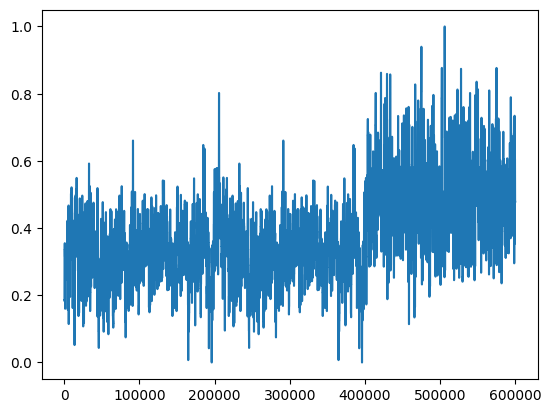

In [ ]:
result['MMD_score_mean_scaled'].plot()

In [ ]:
result['MMD_drift'].value_counts()

,count
MMD_drift,
pseudo_drift,557750
real_drift,42250


In [ ]:
result

,Unnamed: 0,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS,drift_type,block,block_group,MMD_score_mean,MMD_score_mean_scaled,MMD_drift
0,8.615510e+05,3.000000,11.000000,3.000000,4.000000,2.000000,11.000000,1.000000,1.000000,1.000000,2.000000,1,sudden_type1,0,0,0.065332,0.184614,pseudo_drift
1,1.948890e+05,1.000000,1.000000,1.000000,7.000000,1.000000,4.000000,1.000000,12.000000,3.000000,5.000000,0,sudden_type1,0,0,0.065332,0.184614,pseudo_drift
2,5.388540e+05,4.000000,9.000000,4.000000,4.000000,1.000000,3.000000,2.000000,1.000000,2.000000,13.000000,0,sudden_type1,0,0,0.065332,0.184614,pseudo_drift
3,1.087660e+05,4.000000,6.000000,2.000000,11.000000,2.000000,2.000000,1.000000,8.000000,3.000000,2.000000,1,sudden_type1,0,0,0.065332,0.184614,pseudo_drift
4,7.916130e+05,2.000000,5.000000,3.000000,11.000000,4.000000,11.000000,3.000000,2.000000,3.000000,4.000000,1,sudden_type1,0,0,0.065332,0.184614,pseudo_drift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,-1.151159e+06,-1.328935,-24.592244,11.938959,-9.571867,-5.234221,-25.401419,1.415036,-2.751169,-8.212026,31.292830,1,recurrent,11999,2399,0.104891,0.477989,pseudo_drift
599996,-3.006179e+06,-4.120227,-2.228788,-5.036415,-18.732940,-4.522004,18.491464,-4.978621,19.947098,-6.933500,10.295009,9,recurrent,11999,2399,0.104891,0.477989,pseudo_drift
599997,-3.903237e+06,9.521943,-24.736476,-8.602415,21.296008,-1.544984,-47.924788,5.312660,23.690984,0.997549,-34.860399,8,recurrent,11999,2399,0.104891,0.477989,pseudo_drift
599998,-9.370476e+05,-1.501613,-22.194412,5.003653,-35.901058,4.792424,-27.477809,-4.622252,32.133923,-14.906940,-11.789816,2,recurrent,11999,2399,0.104891,0.477989,pseudo_drift


In [ ]:
def majority_drift(series):
    counts = series.value_counts()
    return counts.idxmax() if not counts.empty else "NO_DATA"
# Step 3: Aggregate per block_group
agg_results = result.groupby("block_group").agg({
    "MMD_drift": majority_drift
}).reset_index()
agg_results["block_range"] = agg_results["block_group"].apply(lambda g: f"{g*5}-{g*5+4}")
agg_results

,block_group,MMD_drift,block_range
0,0,pseudo_drift,0-4
1,1,pseudo_drift,5-9
2,2,pseudo_drift,10-14
3,3,pseudo_drift,15-19
4,4,pseudo_drift,20-24
...,...,...,...
2395,2395,pseudo_drift,11975-11979
2396,2396,real_drift,11980-11984
2397,2397,pseudo_drift,11985-11989
2398,2398,real_drift,11990-11994


In [ ]:
agg_results["MMD_drift"] = agg_results["MMD_drift"].replace("pseudo_drift", "PSEUDO_DRIFT")
agg_results["MMD_drift"] = agg_results["MMD_drift"].replace("real_drift", "REAL_DRIFT")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Example: assume your dataframe has columns 'actual' and 'predicted'
y_true = df_accuracies["Ground truth"][:]
y_pred = agg_results["MMD_drift"][:]
# Basic metrics
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred, average="weighted")   # use 'macro' or 'micro' if needed
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Detailed report (per class precision, recall, f1)
report = classification_report(y_true, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.58125
F1 Score: 0.4843886346154896
Precision: 0.7283516758213341
Recall: 0.58125
Confusion Matrix:
 [[1240   14]
 [ 991  155]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.56      0.99      0.71      1254
  REAL_DRIFT       0.92      0.14      0.24      1146

    accuracy                           0.58      2400
   macro avg       0.74      0.56      0.47      2400
weighted avg       0.73      0.58      0.48      2400



**D3**
---

In [ ]:
import numpy as np
import pandas as pd

def make_blockgroup_features(df, feature_columns, block_size=5):
    df = df.copy()
    df["block_group"] = (df["block"] // block_size).astype(int)

    # One vector per block_group (mean per sensor axis)
    X_bg = (
        df.groupby("block_group")[feature_columns]
          .mean()
          .reset_index()
          .sort_values("block_group")
          .reset_index(drop=True)
    )
    return X_bg  # columns: block_group + 6 sensor means


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

def d3_detector_multifeature(X_stream, w=20, rho=0.2, tau=0.7):
    """
    X_stream: numpy array shape (T, d)
    returns:
      drift_flags: array length T (True/False)
      auc_scores:  array length T (float)
    """
    T = X_stream.shape[0]
    new_size = max(2, int(w * rho))     # must be >=2 for stable AUC
    old_size = w

    drift_flags = np.zeros(T, dtype=bool)
    auc_scores  = np.zeros(T, dtype=float)

    # rolling reference index update (matches D3 idea: when drift -> advance faster)
    start = 0
    while True:
        end = start + old_size + new_size
        if end > T:
            break

        old = X_stream[start : start + old_size]
        new = X_stream[start + old_size : end]

        X = np.vstack([old, new])
        s = np.hstack([np.zeros(old.shape[0]), np.ones(new.shape[0])])

        # scale inside the window (important for HAR axes)
        scaler = StandardScaler()
        Xs = scaler.fit_transform(X)

        clf = LogisticRegression(max_iter=200, solver="lbfgs")
        clf.fit(Xs, s)

        # AUC on the same window (baseline style; you can add CV later if you want)
        probs = clf.predict_proba(Xs)[:, 1]
        auc = roc_auc_score(s, probs)

        # write score at the last index of the new window (decision time)
        decision_t = end - 1
        auc_scores[decision_t] = auc
        drift_flags[decision_t] = (auc >= tau)

        # D3-style window shift: if drift, drop w; else drop w*rho
        if drift_flags[decision_t]:
            start = start + old_size
        else:
            start = start + new_size

    return drift_flags, auc_scores


In [ ]:
def run_d3_baseline(df_all, feature_columns, block_size=5, w=20, rho=0.2, tau=0.7):
    # Step A: build block_group feature stream
    X_bg = make_blockgroup_features(df_all, feature_columns, block_size=block_size)
    X_stream = X_bg[feature_columns].values
    drift_flags, auc_scores = d3_detector_multifeature(X_stream, w=w, rho=rho, tau=tau)
    # Step B: convert to your labels at block_group level
    pred = np.where(drift_flags, "REAL_DRIFT", "PSEUDO_DRIFT")
    agg_results = pd.DataFrame({
        "block_group": X_bg["block_group"].values,
        "D3_AUC": auc_scores,
        "D3_drift": pred
    })
    # Optional: create block_range like you did
    agg_results["block_range"] = agg_results["block_group"].apply(
        lambda g: f"{g*block_size}-{g*block_size+(block_size-1)}"
    )
    return agg_results

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
#df_accuracies = pd.read_csv("/content/Ground.csv")
y_true = df_accuracies["Ground truth"].values
agg_results_d3 = run_d3_baseline(
    df_all,
    feature_columns=[
        'S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'
    ],
    block_size=5,
    w=20, rho=0.2, tau=0.4
)
y_pred = agg_results_d3["D3_drift"].values
print("Accuracy:", accuracy_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred, average="weighted"))
print("Precision:", precision_score(y_true, y_pred, average="weighted"))
print("Recall:", recall_score(y_true, y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))


Accuracy: 0.5245833333333333
F1 Score: 0.4006578092591868
Precision: 0.5229737528505484
Recall: 0.5245833333333333
Confusion Matrix:
 [[1197   57]
 [1084   62]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.52      0.95      0.68      1254
  REAL_DRIFT       0.52      0.05      0.10      1146

    accuracy                           0.52      2400
   macro avg       0.52      0.50      0.39      2400
weighted avg       0.52      0.52      0.40      2400



**STUDD**
---

**Teacher Student Model**

In [ ]:
df_all

,Unnamed: 0,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS,drift_type,block
0,8.615510e+05,3.000000,11.000000,3.000000,4.000000,2.000000,11.000000,1.000000,1.000000,1.000000,2.000000,1,sudden_type1,0
1,1.948890e+05,1.000000,1.000000,1.000000,7.000000,1.000000,4.000000,1.000000,12.000000,3.000000,5.000000,0,sudden_type1,0
2,5.388540e+05,4.000000,9.000000,4.000000,4.000000,1.000000,3.000000,2.000000,1.000000,2.000000,13.000000,0,sudden_type1,0
3,1.087660e+05,4.000000,6.000000,2.000000,11.000000,2.000000,2.000000,1.000000,8.000000,3.000000,2.000000,1,sudden_type1,0
4,7.916130e+05,2.000000,5.000000,3.000000,11.000000,4.000000,11.000000,3.000000,2.000000,3.000000,4.000000,1,sudden_type1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,-1.151159e+06,-1.328935,-24.592244,11.938959,-9.571867,-5.234221,-25.401419,1.415036,-2.751169,-8.212026,31.292830,1,recurrent,11999
599996,-3.006179e+06,-4.120227,-2.228788,-5.036415,-18.732940,-4.522004,18.491464,-4.978621,19.947098,-6.933500,10.295009,9,recurrent,11999
599997,-3.903237e+06,9.521943,-24.736476,-8.602415,21.296008,-1.544984,-47.924788,5.312660,23.690984,0.997549,-34.860399,8,recurrent,11999
599998,-9.370476e+05,-1.501613,-22.194412,5.003653,-35.901058,4.792424,-27.477809,-4.622252,32.133923,-14.906940,-11.789816,2,recurrent,11999


In [ ]:
# ============================================================
# CELL 1: Poker – Build df, split, scale, TEACHER ANN
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ============================================================
# Step 0: Reconstruct DataFrame from existing X and y
# ============================================================

feature_columns = [
    'S1', 'C1',
    'S2', 'C2',
    'S3', 'C3',
    'S4', 'C4',
    'S5', 'C5'
]

df = pd.DataFrame(X, columns=feature_columns)
df['CLASS'] = y.iloc[:, 0].values if isinstance(y, pd.DataFrame) else y

df = df.dropna().reset_index(drop=True)

# Ensure block exists (needed for blockwise aggregation later)
if "block" not in df.columns:
    df["block"] = np.arange(len(df))

# ============================================================
# Step 1: Select Features and Target
# ============================================================

X = df[feature_columns]
y = df['CLASS'].astype(int)

# ============================================================
# Step 2: Train–Test Split
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# ============================================================
# Step 3: Feature Scaling
# ============================================================

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

# ============================================================
# Step 4: Build TEACHER ANN (Multi-class)
# ============================================================

num_classes = df['CLASS'].nunique()

teacher = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_sc.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# ============================================================
# Step 5: Compile TEACHER
# ============================================================

teacher.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ============================================================
# Step 6: Train TEACHER
# ============================================================

history_T = teacher.fit(
    X_train_sc,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ============================================================
# Step 7: Evaluate TEACHER
# ============================================================

yT_prob = teacher.predict(X_test_sc, verbose=0)
yT_hat  = np.argmax(yT_prob, axis=1)

print("\n✅ TEACHER Confusion Matrix:")
print(confusion_matrix(y_test, yT_hat))

print("\n✅ TEACHER Classification Report:")
print(classification_report(y_test, yT_hat, digits=4))

print("✅ TEACHER Accuracy:", accuracy_score(y_test, yT_hat))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.4855 - loss: 1.1444 - val_accuracy: 0.5255 - val_loss: 0.9887
Epoch 2/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.5258 - loss: 1.0013 - val_accuracy: 0.5315 - val_loss: 0.9749
Epoch 3/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.5338 - loss: 0.9904 - val_accuracy: 0.5353 - val_loss: 0.9679
Epoch 4/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5378 - loss: 0.9818 - val_accuracy: 0.5511 - val_loss: 0.9559
Epoch 5/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5488 - loss: 0.9703 - val_accuracy: 0.5553 - val_loss: 0.9475

✅ TEACHER Confusion Matrix:
[[25652  3610     1     2    48     2     0     1     8     5]
 [17033  7771     0     3    70     1     0     0     7     1]
 [ 1442  1332     2     3   107     6     0     0    29     6]
 [  441   838     0     3    98     4     0     2    22     5]
 [   11   234     4     6   116     2     0     2    21    11]
 [  10

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# ============================================================
# CELL 2: Poker – Distillation targets + STUDENT ANN (KL)
# ============================================================

from tensorflow.keras.losses import KLDivergence

# -----------------------------------
# Create teacher soft labels on FULL DATA (scaled)
# -----------------------------------
X_all = df[feature_columns]
X_all_sc = scaler.transform(X_all)

teacher_probs_all = teacher.predict(X_all_sc, verbose=0)  # (N, num_classes)

# -----------------------------------
# Build STUDENT ANN (smaller than teacher)
# -----------------------------------
student = Sequential([
    Dense(64, activation='relu', input_shape=(X_all_sc.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
])

student.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=KLDivergence(),     # KL(Teacher || Student)
    metrics=['accuracy']     # imitation progress
)

# -----------------------------------
# Student imitation split (NOT ground truth)
# -----------------------------------
Xs_train, Xs_test, ps_train, ps_test = train_test_split(
    X_all_sc,
    teacher_probs_all,
    test_size=0.3,
    random_state=42
)

history_S = student.fit(
    Xs_train,
    ps_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

print("✅ Student imitation KL on heldout:", student.evaluate(Xs_test, ps_test, verbose=0)[0])


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7363 - loss: 0.1511 - val_accuracy: 0.8910 - val_loss: 0.0127
Epoch 2/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8721 - loss: 0.0169 - val_accuracy: 0.9125 - val_loss: 0.0070
Epoch 3/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8930 - loss: 0.0108 - val_accuracy: 0.9196 - val_loss: 0.0047
Epoch 4/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9045 - loss: 0.0084 - val_accuracy: 0.9359 - val_loss: 0.0036
Epoch 5/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9134 - loss: 0.0074 - val_accuracy: 0.9400 - val_loss: 0.0030
✅ Student imitation KL on heldout: 0.0028565104585140944


In [ ]:
# ============================================================
# CELL 3: Poker – Disagreement stream (Hard + KL)
# ============================================================

from scipy.special import rel_entr

def per_sample_kl(p, q, eps=1e-12):
    p = np.clip(p, eps, 1.0)
    q = np.clip(q, eps, 1.0)
    return np.sum(rel_entr(p, q), axis=1)

# Teacher probs on full stream (original order)
T_probs = teacher_probs_all

# Student probs on full stream
S_probs = student.predict(X_all_sc, verbose=0)

# (A) Hard disagreement stream (0/1)
T_hat = np.argmax(T_probs, axis=1)
S_hat = np.argmax(S_probs, axis=1)
loss_stream_error = (T_hat != S_hat).astype(float)

# (B) Soft disagreement stream (KL)
loss_stream_kl = per_sample_kl(T_probs, S_probs)

print("Example error-loss values:", loss_stream_error[:10])
print("Example KL-loss values:", loss_stream_kl[:10])


Example error-loss values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Example KL-loss values: [0.00098809 0.00025357 0.00112855 0.00075686 0.00101957 0.00094189
 0.00264834 0.00098661 0.00427625 0.00146732]


In [ ]:
# ============================================================
# CELL 4: Poker – Blockwise aggregation + Drift labeling
# ============================================================

def blockwise_loss_labels(df_all, loss_stream, block_size=100, threshold=0.3):
    df_tmp = df_all.copy().reset_index(drop=True)
    df_tmp["loss_raw"] = loss_stream

    # Min-Max scale to [0, 1]
    loss_min = df_tmp["loss_raw"].min()
    loss_max = df_tmp["loss_raw"].max()
    if loss_max > loss_min:
        df_tmp["loss"] = (df_tmp["loss_raw"] - loss_min) / (loss_max - loss_min)
    else:
        df_tmp["loss"] = 0.0

    # Ensure block exists
    if "block" not in df_tmp.columns:
        df_tmp["block"] = np.arange(len(df_tmp))

    # block group
    df_tmp["block_group"] = (df_tmp["block"] // block_size).astype(int)

    # aggregate mean loss per group
    bg = (
        df_tmp.groupby("block_group")["loss"]
        .mean()
        .reset_index()
        .sort_values("block_group")
    )

    # label
    bg["STTUDD_drift"] = np.where(bg["loss"] > threshold, "REAL_DRIFT", "PSEUDO_DRIFT")
    bg["block_range"] = bg["block_group"].apply(
        lambda g: f"{g*block_size}-{g*block_size+(block_size-1)}"
    )

    return bg

agg_sttudd = blockwise_loss_labels(
    df_all=df,
    loss_stream=loss_stream_kl,   # or loss_stream_error
    block_size=100,               # poker is large; 100 is a sane start
    threshold=0.0025
)

print(agg_sttudd.head(20))
print(agg_sttudd["STTUDD_drift"].value_counts())


    block_group      loss  STTUDD_drift block_range
0             0  0.002857    REAL_DRIFT        0-99
1             1  0.002563    REAL_DRIFT     100-199
2             2  0.005242    REAL_DRIFT     200-299
3             3  0.003761    REAL_DRIFT     300-399
4             4  0.003754    REAL_DRIFT     400-499
5             5  0.003740    REAL_DRIFT     500-599
6             6  0.002358  PSEUDO_DRIFT     600-699
7             7  0.004317    REAL_DRIFT     700-799
8             8  0.002665    REAL_DRIFT     800-899
9             9  0.003153    REAL_DRIFT     900-999
10           10  0.002541    REAL_DRIFT   1000-1099
11           11  0.002420  PSEUDO_DRIFT   1100-1199
12           12  0.003475    REAL_DRIFT   1200-1299
13           13  0.002773    REAL_DRIFT   1300-1399
14           14  0.002969    REAL_DRIFT   1400-1499
15           15  0.003662    REAL_DRIFT   1500-1599
16           16  0.002948    REAL_DRIFT   1600-1699
17           17  0.003570    REAL_DRIFT   1700-1799
18          

In [ ]:
# ============================================================
# CELL 5: Poker – Evaluate vs Ground truth (optional)
# ============================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

#df_accuracies = pd.read_csv("/content/Ground.csv")

y_true = df_accuracies["Ground truth"][:2000]
y_pred = agg_sttudd["STTUDD_drift"].values

print("Accuracy:", accuracy_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred, average="weighted"))
print("Precision:", precision_score(y_true, y_pred, average="weighted"))
print("Recall:", recall_score(y_true, y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))

Accuracy: 0.417
F1 Score: 0.285620181725831
Precision: 0.49295899053627756
Recall: 0.417
Confusion Matrix:
 [[  54 1122]
 [  44  780]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.55      0.05      0.08      1176
  REAL_DRIFT       0.41      0.95      0.57       824

    accuracy                           0.42      2000
   macro avg       0.48      0.50      0.33      2000
weighted avg       0.49      0.42      0.29      2000



**Sequential CP-Calibrated C2S**
---

In [ ]:
# ============================================================
# JANG22 SEQUENTIAL CALIBRATED C2ST (COVARIATE SHIFT DETECTOR)
# Full working code: df_all (stream) + df_accuracies (ground truth)
# UPDATED: prints Accuracy + Confusion Matrix + Report automatically
# ============================================================

import numpy as np
import pandas as pd
from collections import deque
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import beta
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report
)

# ============================================================
# 1) CLOPPER–PEARSON CONFIDENCE INTERVAL
# ============================================================
def clopper_pearson_interval(successes, n, alpha=0.05):
    s = int(successes)

    if s == 0:
        lo = 0.0
    else:
        lo = beta.ppf(alpha / 2, s, n - s + 1)

    if s == n:
        hi = 1.0
    else:
        hi = beta.ppf(1 - alpha / 2, s + 1, n - s)

    return lo, hi


# ============================================================
# 2) SEQUENTIAL C2ST WITH CP CALIBRATION (FAST + FIXED)
# ============================================================
def sequential_c2st_cp(
    df_all,
    feature_columns,
    source_df=None,
    source_size=500,
    w=50,
    alpha=0.05,
    random_state=42,
    check_every=1,
    return_debug=True,
    verbose_every=50000
):
    rng = np.random.default_rng(random_state)

    df_stream = df_all.reset_index(drop=True).copy()

    if source_df is None:
        if source_size >= len(df_stream):
            raise ValueError("source_size must be smaller than len(df_all).")
        source_df = df_stream.iloc[:source_size].copy().reset_index(drop=True)
        target_df = df_stream.iloc[source_size:].copy().reset_index(drop=True)
    else:
        source_df = source_df.copy().reset_index(drop=True)
        target_df = df_stream.copy().reset_index(drop=True)

    X_source = source_df[feature_columns].to_numpy(dtype=np.float32)
    X_target = target_df[feature_columns].to_numpy(dtype=np.float32)

    scaler = StandardScaler()
    scaler.fit(X_source)

    X_source_sc = scaler.transform(X_source).astype(np.float32)
    X_target_sc = scaler.transform(X_target).astype(np.float32)

    clf = SGDClassifier(
        loss="log_loss",
        penalty="l2",
        alpha=1e-4,
        learning_rate="optimal",
        random_state=random_state
    )

    # init
    X_init = np.vstack([X_source_sc[:1], X_target_sc[:1]])
    y_init = np.array([0, 1], dtype=int)
    clf.partial_fit(X_init, y_init, classes=np.array([0, 1], dtype=int))

    correct_window = deque(maxlen=2 * w)

    T = X_target_sc.shape[0]
    cov_shift = np.zeros(T, dtype=np.int8)

    if return_debug:
        mu_hat_arr = np.full(T, np.nan, dtype=np.float32)
        lo_arr     = np.full(T, np.nan, dtype=np.float32)
        hi_arr     = np.full(T, np.nan, dtype=np.float32)

    for t in range(T):
        s_idx = rng.integers(0, X_source_sc.shape[0])
        x_s = X_source_sc[s_idx:s_idx+1]
        x_t = X_target_sc[t:t+1]

        yhat_s = int(clf.predict(x_s)[0])
        yhat_t = int(clf.predict(x_t)[0])

        z_s = 1 if yhat_s == 0 else 0
        z_t = 1 if yhat_t == 1 else 0

        correct_window.append(z_s)
        correct_window.append(z_t)

        if len(correct_window) == 2 * w and (t % check_every == 0):
            successes = int(np.sum(correct_window))
            n = 2 * w
            mu_hat = successes / n
            lo, hi = clopper_pearson_interval(successes, n, alpha=alpha)

            cov_shift[t] = 1 if not (lo <= 0.5 <= hi) else 0

            if return_debug:
                mu_hat_arr[t] = mu_hat
                lo_arr[t] = lo
                hi_arr[t] = hi

        clf.partial_fit(np.vstack([x_s, x_t]), np.array([0, 1], dtype=int))

        if verbose_every and ((t + 1) % verbose_every == 0):
            print(f"Processed {t+1}/{T} target steps...")

    out = pd.DataFrame({"t": np.arange(T), "cov_shift": cov_shift})

    if return_debug:
        out["mu_hat"] = mu_hat_arr
        out["cp_lo"] = lo_arr
        out["cp_hi"] = hi_arr

    return out


# ============================================================
# 3) EVALUATION (AUTO PRINT METRICS + CONFUSION MATRIX)
# ============================================================
def evaluate_shift_detection(pred_df, df_accuracies, gt_col="Ground truth", pred_col="cov_shift"):
    """
    Prints Accuracy, Precision, Recall, F1, Confusion Matrix, Report.
    Handles both numeric 0/1 and string labels in ground truth.
    """

    y_pred = pred_df[pred_col].values

    # ----- Ground truth -----
    y_true_raw = df_accuracies[gt_col].values

    # Map GT strings -> 0/1 if needed
    if y_true_raw.dtype == object:
        mapping = {
            "REAL_DRIFT": 1, "PSEUDO_DRIFT": 0,
            "real_drift": 1, "pseudo_drift": 0,
            "SHIFT": 1, "NO_SHIFT": 0,
            "DRIFT": 1, "NO_DRIFT": 0,
            "1": 1, "0": 0
        }
        y_true = np.array([mapping.get(str(v).strip(), v) for v in y_true_raw], dtype=int)
    else:
        y_true = y_true_raw.astype(int)

    # ----- Align length safely -----
    n = min(len(y_true), len(y_pred))
    y_true = y_true[:n]
    y_pred = y_pred[:n]

    # ----- Metrics -----
    acc = accuracy_score(y_true, y_pred)
    f1  = f1_score(y_true, y_pred, average="weighted")
    prec = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    rec  = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    cm   = confusion_matrix(y_true, y_pred)

    print("\n================= EVALUATION RESULTS =================")
    print("Accuracy :", acc)
    print("F1 Score :", f1)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))
    print("======================================================\n")


# ============================================================
# 4) RUN (EXAMPLE)
# ============================================================
feature_columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5']

# IMPORTANT: alpha should be <= 0.05 typically. alpha=0.5 makes it meaningless.
pred = sequential_c2st_cp(
    df_all=df_all,
    feature_columns=feature_columns,
    source_size=500,
    w=50,
    alpha=0.3,        # ✅ recommended
    check_every=5,
    return_debug=True,
    verbose_every=20000
)
print(pred["cov_shift"].value_counts())
print(pred.head(10))
# ---- Load your ground truth and evaluate ----
#df_accuracies = pd.read_csv("/content/Ground.csv")   # <-- your ground truth file path
evaluate_shift_detection(pred, df_accuracies, gt_col="Ground truth", pred_col="cov_shift")
# ---- Save predictions ----
pred.to_csv("jang22_covariate_shift_predictions.csv", index=False)
print("✅ Saved: jang22_covariate_shift_predictions.csv")

Processed 20000/599500 target steps...
Processed 40000/599500 target steps...
Processed 60000/599500 target steps...
Processed 80000/599500 target steps...
Processed 100000/599500 target steps...
Processed 120000/599500 target steps...
Processed 140000/599500 target steps...
Processed 160000/599500 target steps...
Processed 180000/599500 target steps...
Processed 200000/599500 target steps...
Processed 220000/599500 target steps...
Processed 240000/599500 target steps...
Processed 260000/599500 target steps...
Processed 280000/599500 target steps...
Processed 300000/599500 target steps...
Processed 320000/599500 target steps...
Processed 340000/599500 target steps...
Processed 360000/599500 target steps...
Processed 380000/599500 target steps...
Processed 400000/599500 target steps...
Processed 420000/599500 target steps...
Processed 440000/599500 target steps...
Processed 460000/599500 target steps...
Processed 480000/599500 target steps...
Processed 500000/599500 target steps...
Proc

**Visulaization**
---

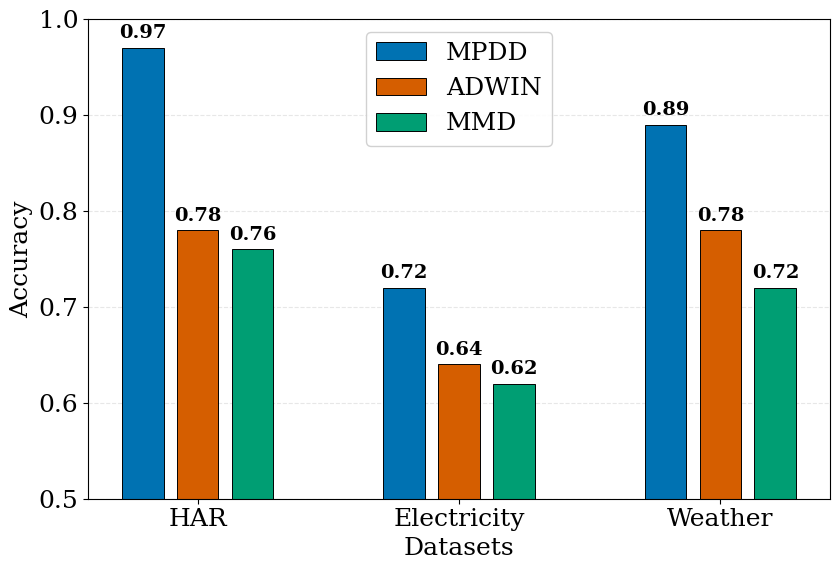

('drift_accuracy_grouped_bars.png', 'drift_accuracy_grouped_bars.pdf')

In [ ]:
# Build a publication-ready grouped bar chart (ACM-style) from the table values.
# You can tweak all parameters in the CONFIG section below.

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# =====================
# CONFIG (tune freely)
# =====================
datasets = ["HAR", "Electricity", "Weather"]  # x-axis labels
methods = ["MPDD", "ADWIN", "MMD"]            # bars per group

# Accuracies read from your table image (per dataset, per method)
# Order: datasets x methods
accuracies = np.array([
    [0.97, 0.78, 0.76],  # HAR
    [0.72, 0.64, 0.62],  # Electricity
    [0.89, 0.78, 0.72],  # Weather
])

# Appearance & layout
fig_size = (8.5, 5.8)        # inches
bar_width = 0.16
bar_gap = 0.05               # extra spacing between method bars
y_min, y_max = 0.5, 1.0      # y-limits for accuracy
grid_alpha = 0.3

# Fonts (ACM-like: serif). If "Times New Roman" isn't available,
# matplotlib will fall back to a similar serif family.
matplotlib.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "DejaVu Serif"],
})

title_text = ""
x_label = "Datasets"
y_label = "Accuracy"

title_size = 16
label_size = 18
tick_size = 18
legend_size = 18


colors = {
    "MPDD": "#0072B2",   # Blue
    "ADWIN": "#D55E00",  # Vermillion/Orange
    "MMD": "#009E73",    # Bluish Green
}
# Output paths
png_path = "drift_accuracy_grouped_bars.png"
pdf_path = "drift_accuracy_grouped_bars.pdf"

# =====================
# PLOT
# =====================
fig, ax = plt.subplots(figsize=fig_size)

n_groups = len(datasets)
x = np.arange(n_groups)

# Compute bar offsets for centered grouping
n_methods = len(methods)
total_bar_span = n_methods * bar_width + (n_methods - 1) * bar_gap
start = - total_bar_span / 2 + bar_width / 2
offsets = [start + i * (bar_width + bar_gap) for i in range(n_methods)]

bars = []
for m_idx, method in enumerate(methods):
    vals = accuracies[:, m_idx]
    bar = ax.bar(x + offsets[m_idx], vals, width=bar_width, label=method, edgecolor="black", linewidth=0.7, color=colors[method])
    bars.append(bar)

# Labels and ticks
ax.set_title(title_text, fontsize=title_size, fontweight="bold")
ax.set_xlabel(x_label, fontsize=label_size)
ax.set_ylabel(y_label, fontsize=label_size)
ax.set_xticks(x)
ax.set_xticklabels(datasets, fontsize=tick_size)
ax.tick_params(axis="y", labelsize=tick_size)

# Axes limits & grid
ax.set_ylim(y_min, y_max)
ax.yaxis.grid(True, linestyle="--", alpha=grid_alpha)
ax.set_axisbelow(True)

# Legend
leg = ax.legend(frameon=True, fontsize=legend_size)
leg.get_frame().set_alpha(0.9)

# Optional: annotate bars with values
for group in bars:
    for rect in group:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=14, fontweight="bold")

fig.tight_layout()
fig.savefig(png_path, dpi=400, bbox_inches="tight")
fig.savefig(pdf_path, bbox_inches="tight")
plt.show()

png_path, pdf_path


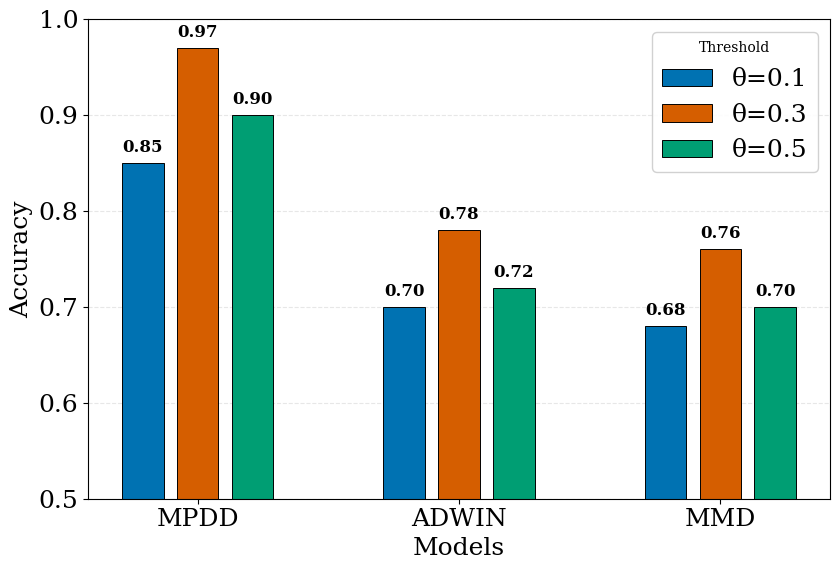

('threshold_accuracy_grouped_bars.png', 'threshold_accuracy_grouped_bars.pdf')

In [ ]:
# Build a publication-ready grouped bar chart (ACM-style) for threshold comparison
# Following the same layout and style as your dataset-based chart

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# =====================
# CONFIG (tune freely)
# =====================
models = ["MPDD", "ADWIN", "MMD"]          # x-axis labels
thresholds = ["θ=0.1", "θ=0.3", "θ=0.5"]   # bars per group

# Accuracies for each threshold across models
accuracies = np.array([
    [0.85, 0.97, 0.90],  # MPDD
    [0.70, 0.78, 0.72],  # ADWIN
    [0.68, 0.76, 0.70],  # MMD
])

# Appearance & layout
fig_size = (8.5, 5.8)        # inches
bar_width = 0.16
bar_gap = 0.05
y_min, y_max = 0.5, 1.0
grid_alpha = 0.3

matplotlib.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "DejaVu Serif"],
})

x_label = "Models"
y_label = "Accuracy"
title_text = ""

title_size = 16
label_size = 18
tick_size = 18
legend_size = 18

colors = {
    "θ=0.1": "#6A5ACD",  # slateblue
    "θ=0.3": "#2E8B57",  # sea green
    "θ=0.5": "#808080",  # gray
}

colors = {
    "θ=0.1": "#0072B2",   # Blue
    "θ=0.3": "#D55E00",  # Vermillion/Orange
    "θ=0.5": "#009E73",    # Bluish Green
}

# Output paths
png_path = "threshold_accuracy_grouped_bars.png"
pdf_path = "threshold_accuracy_grouped_bars.pdf"

# =====================
# PLOT
# =====================
fig, ax = plt.subplots(figsize=fig_size)

n_groups = len(models)
x = np.arange(n_groups)

# Compute bar offsets for centered grouping
n_thresh = len(thresholds)
total_bar_span = n_thresh * bar_width + (n_thresh - 1) * bar_gap
start = - total_bar_span / 2 + bar_width / 2
offsets = [start + i * (bar_width + bar_gap) for i in range(n_thresh)]

bars = []
for t_idx, t in enumerate(thresholds):
    vals = accuracies[:, t_idx]
    bar = ax.bar(x + offsets[t_idx], vals, width=bar_width,
                 label=t, edgecolor="black", linewidth=0.7,
                 color=colors[t])
    bars.append(bar)

# Labels and ticks
ax.set_title(title_text, fontsize=title_size, fontweight="bold")
ax.set_xlabel(x_label, fontsize=label_size)
ax.set_ylabel(y_label, fontsize=label_size)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=tick_size)
ax.tick_params(axis="y", labelsize=tick_size)

# Axes limits & grid
ax.set_ylim(y_min, y_max)
ax.yaxis.grid(True, linestyle="--", alpha=grid_alpha)
ax.set_axisbelow(True)

# Legend (move to upper-right inside the plot)
leg = ax.legend(frameon=True, fontsize=legend_size, title="Threshold")
leg.get_frame().set_alpha(0.9)

# Annotate bars with bold values slightly above the top
for group in bars:
    for rect in group:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha="center", va="bottom",
                    fontsize=12, fontweight="bold")

fig.tight_layout()
fig.savefig(png_path, dpi=400, bbox_inches="tight")
fig.savefig(pdf_path, bbox_inches="tight")
plt.show()

png_path, pdf_path

